# The Best of Both Worlds: Analytics with SAS(R) Viya(R) and Python
- Understand the massively parallel processing capabilities in SAS Viya
- Integrate Python and SAS Viya to process data throughout the analytics life cycle
- Create a dashboard using SAS Visual Analytics


## Project Goal
1. Prepare the data using the Python SWAT package to process data in a distributed environment.
2. Use SAS Visual Analytics to create a dashboard.
3. Learn to create models.

In [2]:
##
## Display image function
##

from IPython.display import Image
def display_image(img):
    ''' Display images for presentation'''
    return Image(url=r'https://raw.githubusercontent.com/pestyld/Python-Integration-to-SAS-Viya/master/images/' + img, embed=True)

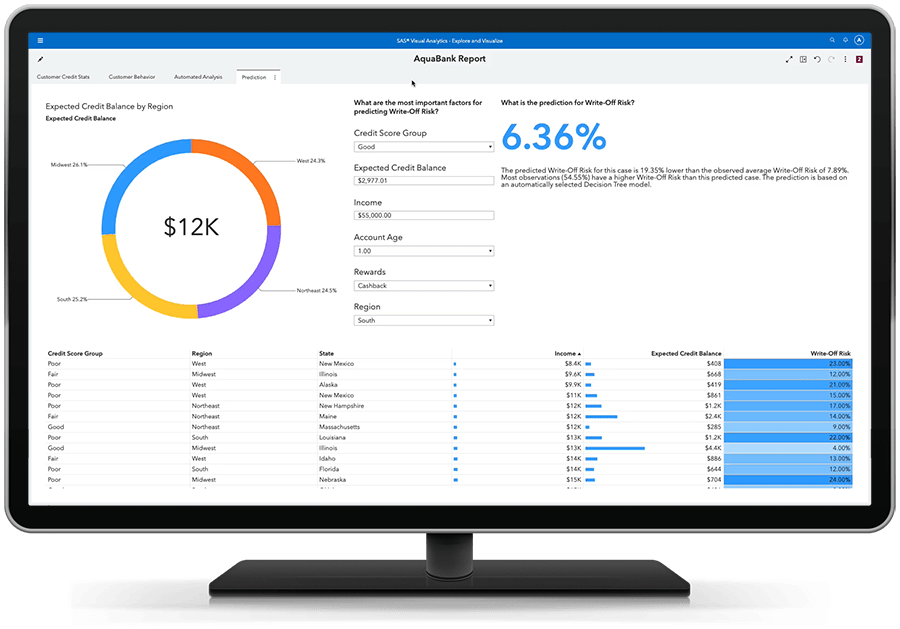

In [3]:
display_image('00_VA_Basic.png')

## Introduction to SAS Viya

### SAS Viya Overview

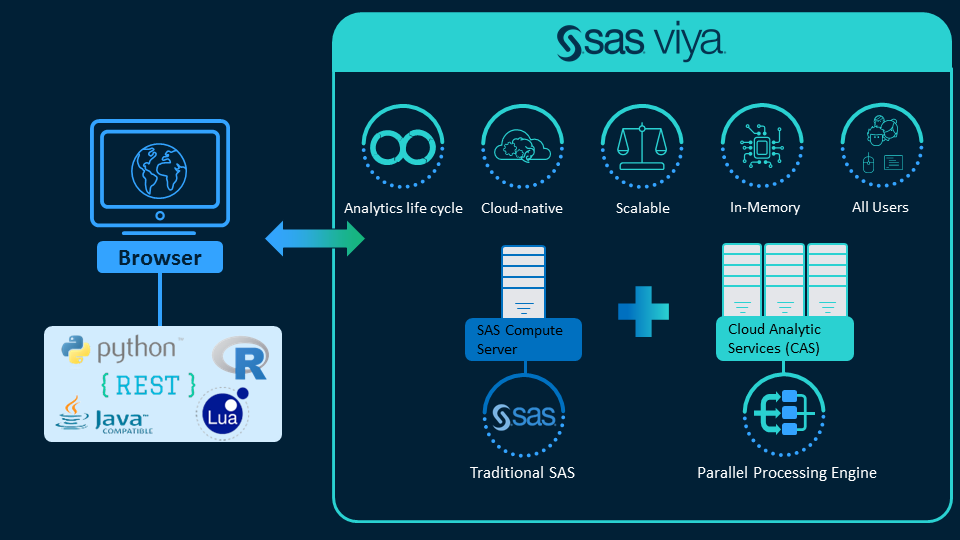

In [4]:
display_image('01_Viya_Overview.png')

**Expand notes below each slide for more information**


SAS Viya contains a variety of applications to process your data through the entirety of the analytics life cycle, but SAS Viya is much more than that. It's
 also cloud native, allowing scalable, web-based access to quick, accurate, and reliable analytical insights. 
Its in-memory engine and parallel processing capabilities can significantly improve the execution speed of your analytics. 
In its entirety, SAS Viya is a collaborative environment for all users. It enables everyone – data scientists, business analysts, developers, report viewers and executives alike – to collaborate, scale, and operationalize insights. 

How does all of this happen? SAS Viya includes multiple servers. The SAS Compute Server and SAS Cloud Analytic Services, or the CAS server for short. 
The SAS Compute Server enables you to execute traditional SAS code. The SAS Compute Server is the Viya equivalent of the SAS®9 workspace server. 

Then there’s the CAS server.  CAS has a massively parallel processing (MPP) architecture that is appropriate for analyzing big data and resource-intensive programs. It performs parallel processing on resident in-memory data to boost performance and produce lightning-fast results. It is optimal for big data and resource-intensive programs like machine learning. In this course, we focus on working with the CAS server in SAS Viya. 

All of these features are accessed from a web browser, and SAS Viya provides integration with open-source languages like Python, R, REST, JAVA, and LUA.

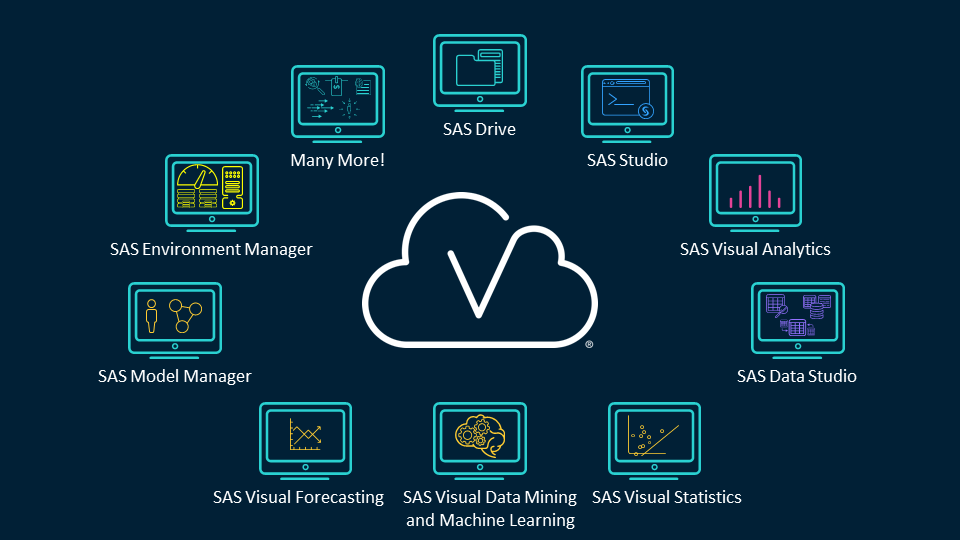

In [5]:
display_image('02_Viya_Apps.png')

SAS Viya consists of many applications that enable you to work with your data no matter your job role or skill level. This can be done through the collection of integrated AI, analytic, and data management solutions in SAS Viya.

- The entry point for SAS Viya is **SAS Drive**, a collaborative interface for accessing, organizing, and sharing content. This application is the gateway to all other applications in SAS Viya. 
- **SAS Studio** is the interactive development environment (IDE) in SAS Viya that enables you to program, build flows, and even use point-and-click tools to process your data. 
- **SAS Visual Analytics** enables you to visualize data, build statistical models, and create interactive dashboards with an easy-to-use point-and-click interface.  
- **SAS Data Studio** is the data preparation application that enables you to easily prepare data using point-and-click transforms. It also enables you to easily embed custom code if necessary.
- **SAS Visual Statistics**, **SAS Visual Data Mining and Machine Learning**, and **SAS Visual Forecasting** are applications built for data scientists. Users can interactively create and refine predictive machine learning models and forecasts. 
- **SAS Model Manager** streamlines the model life cycle 
- **SAS Environment Manager** manages the entire environment. 

These are just a few of the many applications available in SAS Viya. All of these applications enable individuals in an organization to work with data.


### CAS Server Overview

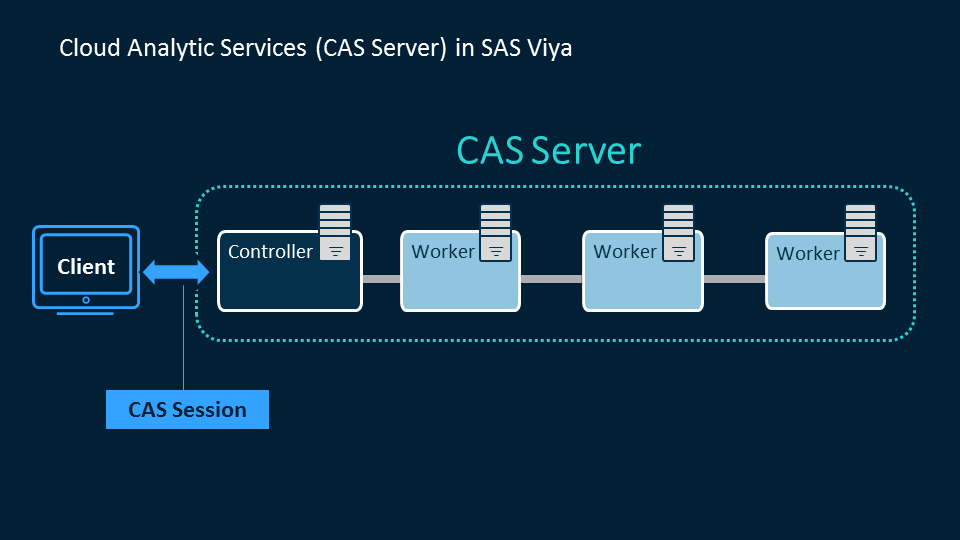

In [6]:
display_image('03_CAS_Overview1.png')

The CAS server is the cloud-native, high-performance in-memory analytics and massively parallel processing engine. The CAS server is configured to run on multiple machines. Typically, you will have one controller node and several worker nodes. You need to make a connection to the CAS server from your client. This is called a CAS session or CAS connection. 

SAS Documentation - [SAS® Cloud Analytic Services: Fundamentals](https://go.documentation.sas.com/doc/en/pgmsascdc/default/casfun/titlepage.htm)

For data to be processed in CAS, data is copied into memory from some data source, and data blocks are automatically distributed across the worker nodes and loaded into memory. This is called serial loading. Once data is loaded into memory it persists in memory until explicitly dropped or the CAS session ends. 

You can also load data into memory in parallel. View the following resources for additional information:
- [Five Approaches for High-Performance Data Loading to the SAS® Cloud Analytic Services Server](https://www.sas.com/content/dam/SAS/support/en/sas-global-forum-proceedings/2018/1854-2018.pdf)
-[Parallel data load to SAS Viya](https://communities.sas.com/t5/SAS-Communities-Library/Parallel-data-load-to-SAS-Viya/ta-p/361318#:~:text=In%20SAS%C2%AE%20Viya%E2%84%A2,sets%20into%20the%20CAS%20server.)
- [4 Approaches for Parallel Data Loading to CAS](https://communities.sas.com/t5/SAS-Communities-Library/4-Approaches-for-Parallel-Data-Loading-to-CAS/ta-p/370955)]
- [How to Parallel Load and Compress a SAS® Cloud Analytic Services (CAS) Table](https://blogs.sas.com/content/sgf/2019/10/17/how-to-parallel-load-and-compress-a-sas-cloud-analytic-services-cas-table/)

If you persist the data in memory, it enables multiple users to access the same in-memory table without any additional I/O (data load from disk to memory). Because I/O is more resource intensive, having data preloaded into memory speeds up the processing for all users.   

For example, person A can execute a variety of Python programs, person B can create dashboards using SAS Visual Analytics, and person C can execute machine learning models. All users can do this using the same in-memory table copy. 

In all instances, the controller accepts the programs from the client and distributes code to the workers. The workers perform coordinated parallel processing on their portion of the data, with multiple nodes executing the same actions on different parts of the data at the same time. The controller monitors progress and coordinates re-assembling the result segments produced by each worker. If requested by the client, the controller then returns the results to the client for further processing. Modifications to the in-memory table are not reflected in the physically stored data source. If you want to update the physical data source, the in-memory table must be explicitly saved back to the physical storage location.

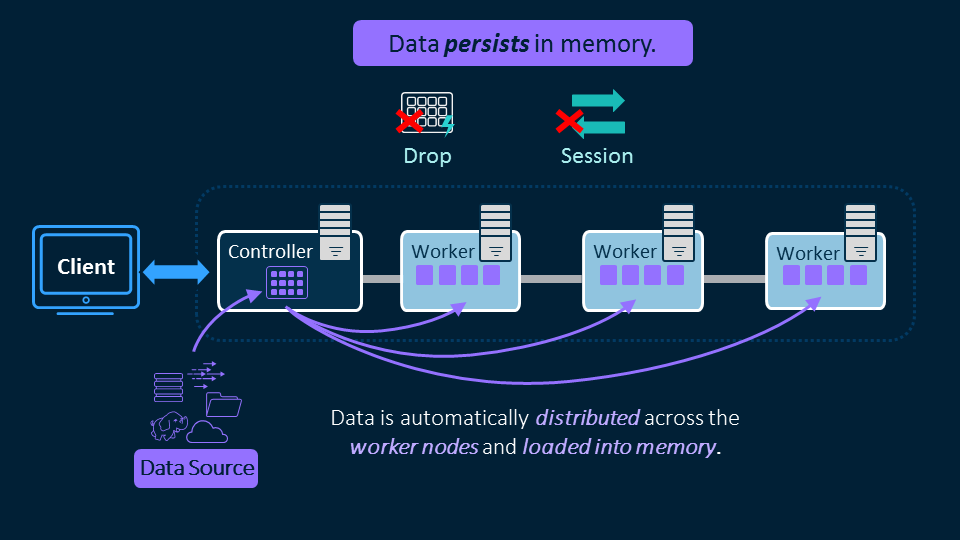

In [7]:
display_image('03_CAS_Overview2.png')

The CAS server needs to access data from some physical data source. CAS can access data from a variety of sources using [SAS Viya Data Connectors](https://go.documentation.sas.com/doc/en/pgmsascdc/v_029/casref/p0j09xx6p9ffven1x7z9cq8s1zaa.htm), including databases, Hadoop, streaming data, path-based files, and data stored in the cloud.

Once data is loaded into memory on the CAS server, you can process that data using CAS actions. Actions are optimized units of work built for the distributed CAS server. CAS actions provide a range of functionality from managing, processing, analyzing, and modeling data, to executing most traditional SAS DATA step, FedSQL, and even DS2! 

CAS actions are organized into groups called CAS action sets, and the actions within a set perform related tasks. You can think of action sets as a package, and the actions within an action set as methods. 

For example, the table action set provides many actions for accessing and managing data.  These include the caslibInfo action to view available data sources, the tableInfo action to view available tables, the fileInfo action to list the data source files, and the fetch action to retrieve n rows of a table.

You request a specific action by specifying the action set name, a period, and the action name. Specifying the action set name is usually optional. However, there are a few actions with the same name in different action sets. In those cases, the action set name is required. In this course, we typically specify only the action.

CAS actions provide a variety of benefits.
- First, CAS actions are optimized to run in the CAS server's massively parallel processing engine for lightening-fast results.
- Second, the same CAS action is used regardless of programming language or application. That means you can use the same CAS action in CASL, Python, R, and more. This enables you to easily pass information between languages.
- When using actions in different languages, the results are equivalent (given seeds).
- Lastly, actions are multi-purpose. Actions perform a specific task, and within that task, an action can also perform a variety of other tasks like create a new table, create calculated columns, filter rows and columns, and group data.

The question is, how can you execute actions? 

SAS Viya provides a variety of interfaces for executing CAS actions. One way to execute actions on the CAS server is to use the native CAS language, or CASL for short. CASL supports executing CAS actions on the CAS server and uses normal programing logic. If you have experience using languages like Lua, Python, or R, CASL will be an easy language to learn.

Instead of using CASL, you can also execute CAS actions through the CAS API using traditional SAS programming, FedSQL, Java, Python, R, Lua, and REST API. This course focuses on using the Python language.

 Lastly, you can use a variety of SAS Viya applications like SAS Visual Analytics to create dashboards, SAS Visual Statistics and SAS Visual Data Mining and Machine Learning for modeling and statistics, and a variety of others. All applications execute actions behind the scenes.


NOTES:
1. With the SAS programming language, many PROCs and much of the traditional DATA step is CAS enabled and can be executed on CAS tables. For more information about how to execute traditional SAS code in SAS Viya, you can view the Programming for SAS Viya course: https://support.sas.com/edu/schedules.html?crs=PGVIYA&ctry=US.
2. For Java, you must use the CASClient class.
3. For Python, R, and Luna, the SWAT package is required. Many familiar methods are available through the SWAT package.
4. The CAS API converts the native language syntax to CAS actions behind the scenes.
5. Visit the SAS website for detailed information about all available SAS Viya offerings.

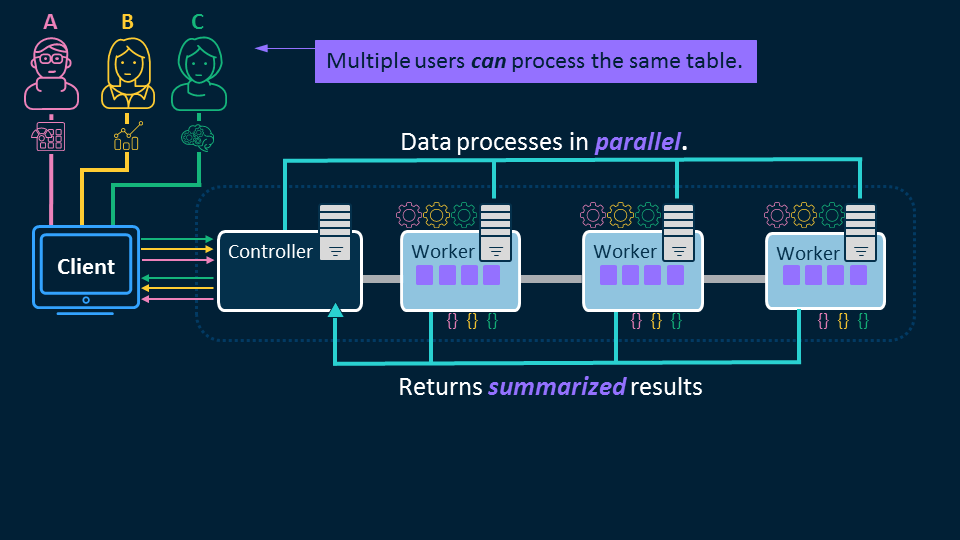

In [8]:
display_image('03_CAS_Overview3.png')

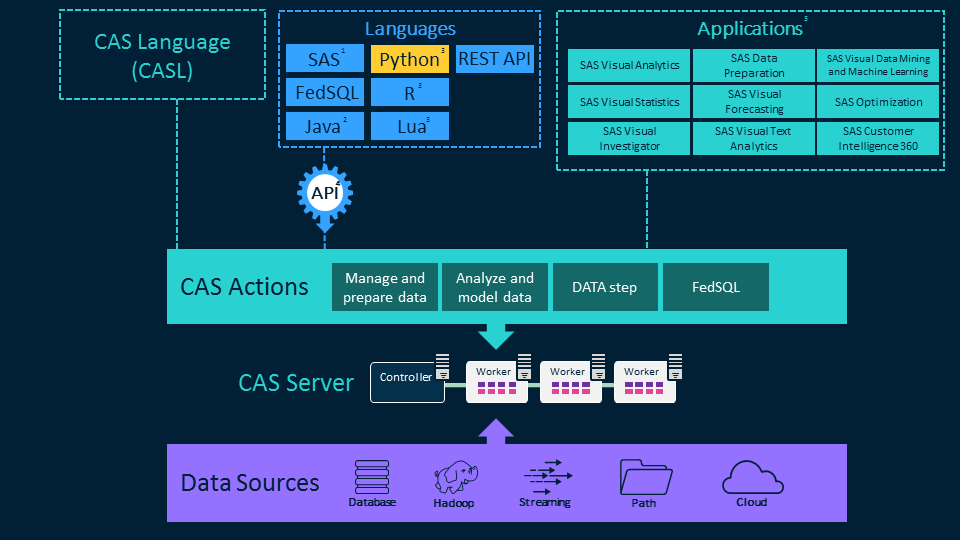

In [9]:
display_image('03_CAS_Overview4.png')

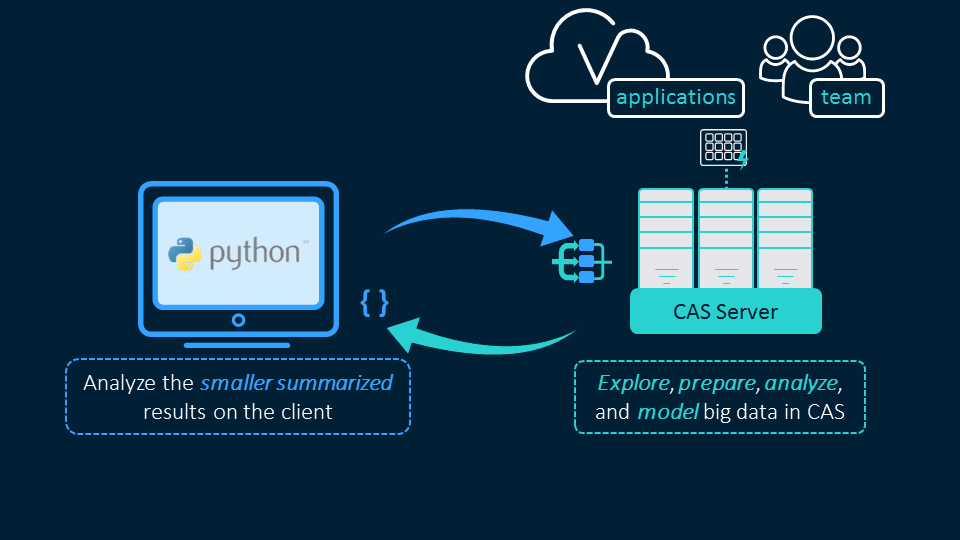

In [10]:
display_image('05_Client_Server.png')

You can use Python on your client to explore, prepare, analyze, and model big data on the CAS server using familiar Python syntax along with CAS actions to take advantage of the parallel processing power of CAS. If you are preparing data in CAS, you can then share that data with other users or other SAS Viya applications like SAS Visual Analytics to create shareable dashboards. 

If you are exploring, analyzing, or modeling data in CAS to take advantage of the in-memory parallel processing power,  CAS returns smaller summarized results back to your local Python client. Once the summarized results from the CAS server are returned to your client, you can use native Python packages on the smaller, more manageable data.


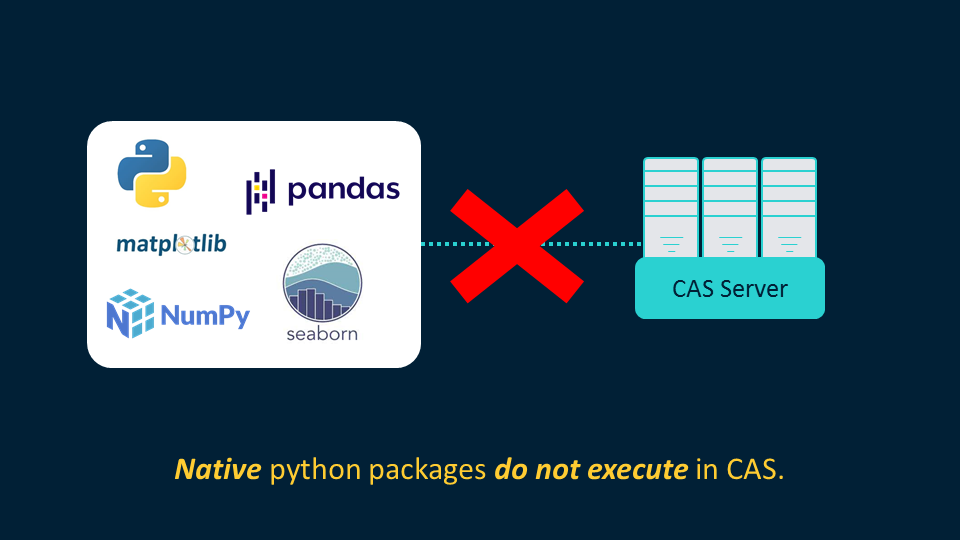

In [11]:
display_image('07_pandas.png')

As an experienced Python programmer, you most likely are familiar with Python packages like Pandas, Matplotlib, NumPy, and seaborn. You might be thinking, “Great, I can use these packages on data in CAS!” 

**False!**

Although these are great packages, they do not execute on data on the CAS server. I'll repeat this because it's very important and a common misconception.  Native Python packages do not execute on data on the CAS server.


### SWAT Package Overview
[SWAT Documentation](https://sassoftware.github.io/python-swat/getting-started.html)

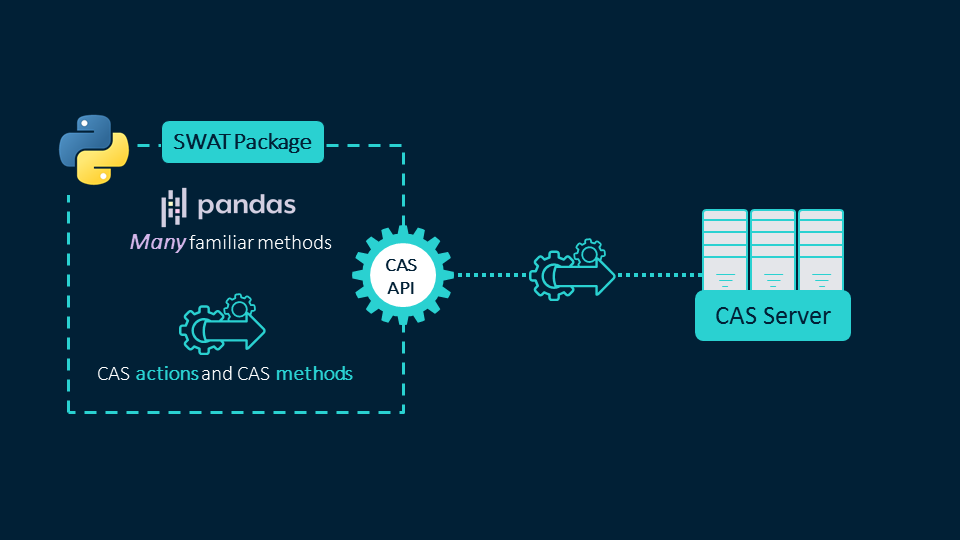

In [12]:
display_image('08a_swat.png')

In order to process data with Python on the CAS server, you must use the SAS Scripting Wrapper for Analytics Transfer, or the SWAT package for short. This is an open-source package used with Python, R, and Lua. With the SWAT package, you can write a program that connects to the CAS server, quickly load large amounts of data into memory, analyze the data, and then work with the results of your analysis using familiar techniques in the open-source language of your choice.

The Python SWAT package contains many familiar Pandas methods, functions, and attributes that work like their counterparts. However, not all methods and functions are available, so be sure to download the latest version of the SWAT package for the most up-to-date functionality.

The SWAT package also contains an enormous number of CAS actions and CAS methods that can be used to process your data.

For example, with the SWAT package, you can use the familiar head method from the Pandas API on a CAS table to return the first n rows of a CAS table.

In all cases, the code is translated through the CAS API into the same fetch CAS action behind the scenes and sent to the CAS server. The action is processed in CAS, and the results are sent from the CAS server to the client.The CAS API converts familiar Pandas methods into actions behind the scenes, but you can also execute actions directly through the SWAT package.

In this example, you can execute the same fetch CAS action in Python. The action is sent to the CAS server, and CAS processes the action and returns the results to the client. The same action can be used in all languages that work with CAS.

The CAS API converts familiar Pandas methods into actions behind the scenes, but you can also execute actions directly through the SWAT package.

In this example, you can execute the same fetch CAS action in Python. The action is sent to the CAS server, and CAS processes the action and returns the results to the client. The same action can be used in all languages that work with CAS.

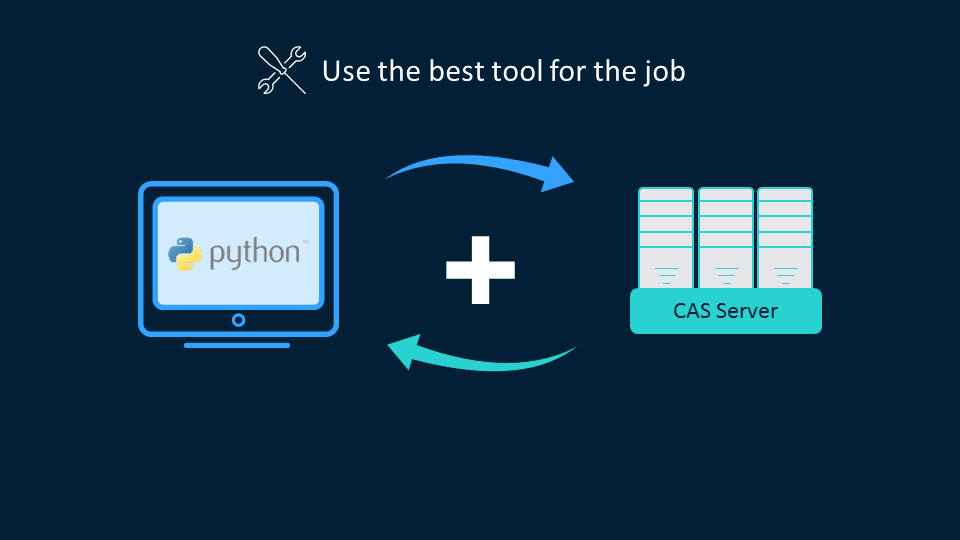

In [13]:
display_image('09_client_server.png')

In the end, having both your Python client and the CAS server offers you a lot of flexibility. The goal is to look at each as a tool and determine the best tool for the job.

# Accessing, exploring, preparing and analyzing data using the Python SWAT Package

## 1. Setup

### a. Import packages

In [14]:
import sys
import os
import swat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Set pandas column options
pd.set_option('max_colwidth', 200)
pd.set_option('display.max_columns', None)


## My personal module to connect to CAS. Will not work in other environments. The package is specific to my connection.
try:
    from casauth import CASAuth
    print('Imported personal custom CAS auth package')
except:
    print('casauth package not available')

    
## Check Python and package versions
print(f'Python version:{sys.version.split(" ")[0]}')
print(f'numpy:{np.__version__}')
print(f'pandas:{pd.__version__}')
print(f'swat:{swat.__version__}')

Imported personal custom CAS auth package
Python version:3.8.16
numpy:1.24.3
pandas:1.5.3
swat:1.13.1


### b. Connect to the CAS server

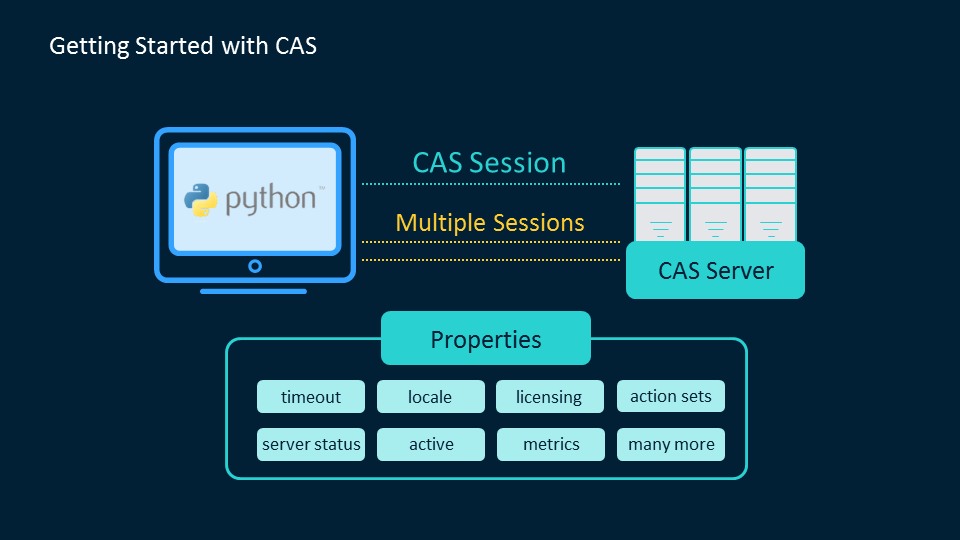

In [15]:
display_image('10_CAS_session.png')

To begin working with CAS, you need to make a connection to the CAS server. This is known as a CAS session. A CAS session contains a variety of information and properties. These include server status and licensing, as well as session properties like timeout, locale, active caslib, metrics, and more. 

You can also create multiple CAS sessions on the CAS server, and these CAS sessions are independent of each other. One reason you would want to create multiple CAS sessions is to execute programs in parallel. One example would be if you want to execute three different machine learning models at the same time. Otherwise, if you do not terminate your connection to CAS, you might mistakenly create multiple connections to CAS, consuming resources.


To connect to the CAS server, you need:
- the host name, 
- the port number, 
- authentication

**Be aware that connecting to the CAS server can be implemented in various ways, so you might need to see your system administrator about how to make a connection. Please follow company policy regarding authentication.**

In [16]:
## my personal environment connection information to SAS Viya (will not work in your environment)
try:
    path = os.getenv('CAS_CREDENTIALS')
    pem_file = os.getenv('CAS_CLIENT_SSL_CA_LIST')
    conn = CASAuth(path, ssl_ca_list = pem_file)
except:
    print('Use your own connection information with the swat.CAS method')

    
###################################################################################
## General syntax
###################################################################################
## conn = swat.CAS('server.demo.sas.com', port number, 'username', 'password')
###################################################################################


###################################################################################
## Viya for Learners 3.5 CAS connection information
###################################################################################
# hostValue = os.environ.get('CASHOST')
# portValue = os.environ.get('CASPORT')
# passwordToken=os.environ.get('SAS_VIYA_TOKEN')
# conn = swat.CAS(hostname=hostValue,port=portValue,password=passwordToken)

The access token may have expired - attempting to refresh the token
The access token was stored for you in the access_token.txt file. The access token expires in 24 hours.
CAS Connection created


**REQUIREMENT: Add your connection information below**

In [17]:
## conn = swat.CAS('server.demo.sas.com', port number, 'username', 'password')

View the type of the **conn** object.

In [18]:
type(conn)

casauth.casauth.CASAuth

Confirm the connection is working and view the version of SAS Viya.

In [19]:
try:
    print(conn.about()['About']['Viya Version'])  ## SAS Viya version
except:
    print(conn.about()['About']['Version'])       ## SAS Viya 3.5 VFL version

NOTE: Grid node action status report: 5 nodes, 9 total actions executed.
Stable 2023.08


### c. Set up demonstration data
Create the demonstration data. The demonstration data comes from the **Samples** caslib in SAS Viya. The **Samples** caslib is included in SAS Viya installations. The data is a small sample table for training purposes.

In [20]:
def setup_demo_data(datasourcefile, incaslib, outfilename, outcaslib):
    '''
    Function 
    - loads a server-side file into memory (datasourcefile) from a specific caslib (incaslib) and names the CAS table demo_data in the Casuser caslib
    - saves the demo_data CAS table from the Casuser caslib as the specific data source file (outfilename) in the specified caslib (outcaslib)
    - drops the demo_data CAS table from the Casuser caslib after it has been saved as a data source file
    '''
    
    # Load data into memory abd name it demo_data in the casuser caslib
    conn.loadTable(path = datasourcefile, caslib = incaslib,
                   casout = {'name':'demo_data', 'caslib':'casuser', 'replace':True})

    # Save the demo_data CAS table back to disk
    conn.save(table = {'name':'demo_data', 'caslib':'casuser'},
              name = outfilename, caslib = outcaslib, replace=True)
    
    # Drop the demo_data CAS table
    conn.dropTable('demo_data', caslib = 'casuser')

##    
## Load demo data
##
setup_demo_data(datasourcefile='WARRANTY_CLAIMS_0117.sashdat', incaslib='samples',        ## Load the sashdat file into CAS
                outfilename='warranty_demo.csv', outcaslib='casuser')                     ## Save the CAS table as a CSV file

NOTE: Cloud Analytic Services made the file WARRANTY_CLAIMS_0117.sashdat available as table DEMO_DATA in caslib CASUSER(Peter.Styliadis@sas.com).
NOTE: Cloud Analytic Services saved the file warranty_demo.csv in caslib CASUSER(Peter.Styliadis@sas.com).
NOTE: Cloud Analytic Services dropped table demo_data from caslib CASUSER(Peter.Styliadis@sas.com).


## 2. Explore available data in the CAS server

[SAS Viya Data Connectors](https://go.documentation.sas.com/doc/en/pgmsascdc/default/casref/p0j09xx6p9ffven1x7z9cq8s1zaa.htm) contain connection information and data-source specifics to connect with data sources throughout your organization.

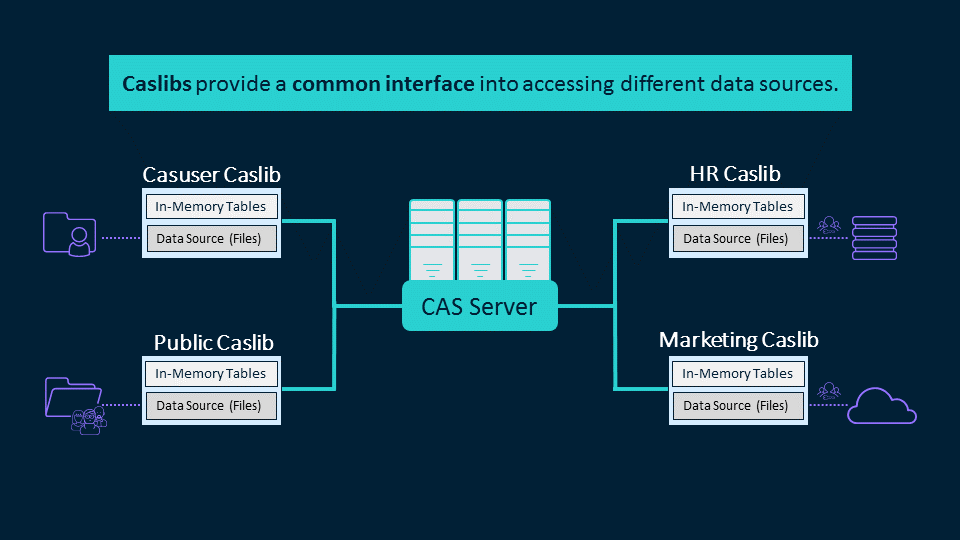

In [21]:
display_image('11a_caslibs.png')

CAS stores and accesses data via caslibs. Caslibs provide a common interface into accessing different data sources. No matter which data source you access in CAS, it is connected via a caslib. Caslibs connect into a variety of data sources in your organization.

A caslib consists of three main parts. 

First, there’s the data source portion. The data source portion contains connection information to a physical data source for storage. Data might be stored on disk in a path with familiar formats such as SAS data sets, CSV, Microsoft Excel, or parquet files, or stored in databases, the cloud, Hadoop, or other systems. The data source portion stores the connection and authorization information required for interacting with those files using SAS Viya data connectors. Data stored in the data source portion of a caslib is generally referred to as files. Files in the data source area cannot be processed directly. 

The second part of a caslib is the in-memory portion. The in-memory portion provides a space to hold tables that can have operations performed on them. You can almost think of a CAS table as a DataFrame on the CAS server. A file must first be loaded into memory from a data source. Data loaded into memory is generally referred to as tables or CAS tables. >When they are loaded, in-memory tables are available for processing, and they persist in memory. Because there's no connection between the in-memory copy and the data source file, if you want to permanently keep changes made to the data during processing, the in-memory table should be explicitly written back to the data source. If you are done with the CAS table, you can drop the table. We discuss this more later.

Lastly, a caslib contains access controls about who can access that specific caslib.

### a. View available caslibs (data sources) in the CAS server

In [22]:
conn.caslibInfo()

,Name,Type,Description,Path,Definition,Subdirs,Local,Active,Personal,Hidden,Transient
0,AIoTPgMeta,PATH,Stores quality analytic suite postgres tables.,/cas/data/caslibs/aiotPgMeta/,,0.0,0.0,0.0,0.0,0.0,0.0
1,CASUSER(Peter.Styliadis@sas.com),PATH,Personal File System Caslib,/cas/data/caslibs/casuserlibraries/peter.styliadis@sas.com/,,1.0,0.0,1.0,1.0,0.0,1.0
2,cpgretl,PATH,,/cas/data/caslibs/cpgretail/,,1.0,0.0,0.0,0.0,0.0,0.0
3,CPSAppData,PATH,,/cas/data/caslibs/CPSAppData/,,0.0,0.0,0.0,0.0,0.0,0.0
4,EDUPub,PATH,,/cas/data/caslibs/edupub/,,0.0,0.0,0.0,0.0,0.0,0.0
5,EP_CommunityCollege,PATH,,/cas/data/caslibs/educationpractice/EP_CommunityCollege/,,0.0,0.0,0.0,0.0,0.0,0.0
6,EP_DOE,PATH,,/cas/data/caslibs/educationpractice/EP_DOE/,,0.0,0.0,0.0,0.0,0.0,0.0
7,EP_Forecasting,PATH,,/cas/data/caslibs/educationpractice/EP_Forecasting/,,0.0,0.0,0.0,0.0,0.0,0.0
8,EP_K12,PATH,,/cas/data/caslibs/educationpractice/EP_K12/,,0.0,0.0,0.0,0.0,0.0,0.0
9,EP_SAfE,PATH,,/cas/data/caslibs/educationpractice/EP_SAfE/,,0.0,0.0,0.0,0.0,0.0,0.0


### b. View available data source files in a caslib

In [23]:
conn.fileInfo(caslib = 'samples')

,Permission,Owner,Group,Name,Size,Encryption,Time,ModTime
0,-rwxr-xr-x,sas,sas,COSTCHANGE.sashdat,9776,NONE,2021-12-18T18:35:03+00:00,1.955472e+09
1,-rwxr-xr-x,sas,sas,PROMO_EFFECTIVENESS_X_EFFECTS_2.sashdat,9312,NONE,2021-12-18T18:35:03+00:00,1.955472e+09
2,-rwxr-xr-x,sas,sas,RAND_RETAILDEMO.sashdat,42612664,NONE,2021-12-18T18:35:04+00:00,1.955472e+09
3,-rwxr-xr-x,sas,sas,SW_LAKE_RT_SENSOR_WATERQUALITY.sashdat,301312,NONE,2021-12-18T18:35:04+00:00,1.955472e+09
4,-rwxr-xr-x,sas,sas,WARRANTY_CLAIMS_0117.sashdat,13563272,NONE,2021-12-18T18:35:04+00:00,1.955472e+09
5,-rwxr-xr-x,sas,sas,WATER_CLUSTER.sashdat,773208,NONE,2021-12-18T18:35:04+00:00,1.955472e+09
6,-rwxr-xr-x,sas,sas,predef_svrtdist.sashdat,78872,NONE,2023-08-08T05:25:28+00:00,2.007092e+09


In [24]:
conn.fileInfo(caslib = 'casuser')

,Permission,Owner,Group,Name,Size,Encryption,Time,ModTime
0,-rwxr-xr-x,sas,sas,cars.sas7bdat,139264,,2023-02-23T14:21:31+00:00,1.992781e+09
1,-rwxr-xr-x,sas,sas,previoussales.sas7bdat,73728,,2023-04-26T20:22:48+00:00,1.998160e+09
2,-rwxr-xr-x,sas,sas,VTI.sashdat,413080,NONE,2022-10-11T13:40:38+00:00,1.981115e+09
3,-rwxr-xr-x,sas,sas,hmeq.sashdat,630384,NONE,2022-10-13T17:56:59+00:00,1.981303e+09
4,-rwxr-xr-x,sas,sas,tsa_claims_raw.csv,34936205,,2023-09-18T13:09:17+00:00,2.010662e+09
5,-rwxr-xr-x,sas,sas,warranty_demo.csv,53297896,,2023-09-19T13:40:52+00:00,2.010750e+09
6,-rwxr-xr-x,sas,sas,warranty_final.sashdat,116882608,NONE,2023-09-18T15:25:48+00:00,2.010670e+09
7,-rwxr-xr-x,sas,sas,cars.parquet,4096,NONE,2022-11-17T14:19:19+00:00,1.984314e+09
8,-rwxr-xr-x,sas,sas,RAND_RETAILDEMO.csv,240072190,,2023-05-30T13:10:38+00:00,2.001071e+09
9,-rwxr-xr-x,sas,sas,warranty_final.csv,43615117,,2023-05-30T13:52:57+00:00,2.001074e+09


### c. View available in-memory CAS tables in a caslib

In [25]:
conn.tableInfo(caslib = 'samples')

,Name,Label,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,RAND_RETAILDEMO,,930046,40,0,utf-8,2023-09-19T01:28:33+00:00,2023-09-19T01:28:33+00:00,2023-09-19T12:27:37+00:00,UTF8,2.010706e+09,2.010706e+09,2.010746e+09,1,0,0,0,RAND_RETAILDEMO.sashdat,Samples,1,Makoto.Unemi@sas.com,,2021-12-18T18:35:04+00:00,1.955472e+09
1,PROMO_EFFECTIVENESS_X_EFFECTS_2,promo_effectiveness_x_effects_2,14,11,0,utf-8,2023-09-19T01:28:38+00:00,2023-09-19T01:28:38+00:00,2023-09-19T12:27:37+00:00,UTF8,2.010706e+09,2.010706e+09,2.010746e+09,1,0,0,0,PROMO_EFFECTIVENESS_X_EFFECTS_2.sashdat,Samples,1,Makoto.Unemi@sas.com,,2021-12-18T18:35:03+00:00,1.955472e+09
2,COSTCHANGE,,32,10,0,utf-8,2023-09-19T12:27:50+00:00,2023-09-19T12:27:50+00:00,2023-09-19T13:04:28+00:00,UTF8,2.010746e+09,2.010746e+09,2.010748e+09,1,0,0,0,COSTCHANGE.sashdat,Samples,1,Tom.Orwald@sas.com,,2021-12-18T18:35:03+00:00,1.955472e+09
3,WARRANTY_CLAIMS_0117,,153217,42,0,utf-8,2023-09-19T12:27:50+00:00,2023-09-19T12:27:50+00:00,2023-09-19T13:04:29+00:00,UTF8,2.010746e+09,2.010746e+09,2.010748e+09,1,0,0,0,WARRANTY_CLAIMS_0117.sashdat,Samples,1,Tom.Orwald@sas.com,,2021-12-18T18:35:04+00:00,1.955472e+09


In [17]:
conn.tableInfo(caslib = 'casuser')

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,GOV_IT_BUDGET_NARROW,13555,6,0,utf-8,2023-08-01T17:19:34+00:00,2023-08-01T17:19:35+00:00,2023-08-01T17:38:53+00:00,UTF8,2.006530e+09,2.006530e+09,2.006531e+09,1,0,0,0,gov_it_budget_narrow.sashdat,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-08-01T17:18:46+00:00,2.006530e+09


## 3. Load a data source file into memory

### a. Load a server-side file into memory

Confirm the **warranty_demo.csv** file is available.

In [26]:
conn.fileInfo(caslib = 'casuser', path='warranty_demo.csv')

,Permission,Owner,Group,Name,Size,Encryption,Time,ModTime
0,-rwxr-xr-x,sas,sas,warranty_demo.csv,53297896,,2023-09-19T13:40:52+00:00,2.010750e+09


Load the **warranty_demo.csv** data source file into memory into the **Casuser** caslib. This is similar to loading a file as a DataFrame in pandas.

In [27]:
conn.loadTable(path = 'warranty_demo.csv', caslib = 'casuser',   ## Specify the data source file and caslib location to load into memory
               importOptions = {'fileType':'CSV',                ## Import file specifications
                                'guessRows':10000},
               casOut = {'name':'warranty_demo',                 ## Specify the output CAS table information
                         'caslib':'casuser',
                         'replace':True})

NOTE: Cloud Analytic Services made the file warranty_demo.csv available as table WARRANTY_DEMO in caslib CASUSER(Peter.Styliadis@sas.com).


[caslib]

 'CASUSER(Peter.Styliadis@sas.com)'

[tableName]

 'WARRANTY_DEMO'

[casTable]

 CASTable('WARRANTY_DEMO', caslib='CASUSER(Peter.Styliadis@sas.com)')

+ Elapsed: 0.472s, user: 1.41s, sys: 0.565s, mem: 505mb

View the available in-memory tables on the CAS server. The **WARRANTY_DEMO** CAS table is in-memory on the CAS server.

In [28]:
conn.tableInfo(caslib = 'casuser')

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,WARRANTY_DEMO,153217,42,0,utf-8,2023-09-19T13:42:06+00:00,2023-09-19T13:42:06+00:00,2023-09-19T13:42:06+00:00,UTF8,2.010750e+09,2.010750e+09,2.010750e+09,0,0,0,0,warranty_demo.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-09-19T13:40:52+00:00,2.010750e+09


### b. Explore the CAS table

Reference the CAS table.

In [29]:
castbl = conn.CASTable('WARRANTY_DEMO', caslib = 'casuser')
castbl

CASTable('WARRANTY_DEMO', caslib='casuser')

View the object type.

In [30]:
type(castbl)

swat.cas.table.CASTable

View the attributes of the CAS table.

In [31]:
castbl.shape

(153217, 42)

View details about the CAS table using the tableDetails CAS action.

In [32]:
castbl.tableDetails()

,Node,Blocks,Active,Rows,IndexSize,DataSize,VardataSize,CompressedSize,CompressionRatio,Mapped,MappedMemory,Unmapped,UnmappedMemory,Allocated,AllocatedMemory,DeletedRows,TableLocation
0,ALL,210,105,153217,0,104045473,28049841,0,0,105,104058112,105,104058112,0,0,0,CAS


View the column attributes of a CAS table.

In [33]:
castbl.columnInfo()

,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,claim_attribute_1,,1,varchar,6,6,,0,0
1,seller_attribute_5,,2,double,8,12,,0,0
2,product_attribute_1,,3,varchar,2,2,,0,0
3,product_attribute_2,,4,varchar,2,2,,0,0
4,product_attribute_3,,5,double,8,12,,0,0
5,product_attribute_4,,6,varchar,6,6,,0,0
6,product_attribute_5,,7,double,8,12,,0,0
7,customer_attribute_1,,8,varchar,6,6,,0,0
8,x_product_attribute7,,9,varchar,10,10,,0,0
9,x_product_attribute9,,10,varchar,10,10,,0,0


Preview the distributed CAS table.

In [34]:
castbl.head()

,claim_attribute_1,seller_attribute_5,product_attribute_1,product_attribute_2,product_attribute_3,product_attribute_4,product_attribute_5,customer_attribute_1,x_product_attribute7,x_product_attribute9,srvc_prvdr_attribute_1,srvc_prvdr_attribute_4,srvc_prvdr_attribute_2,srvc_prvdr_attribute_3,srvc_prvdr_attribute_5,primary_labor_group_desc,primary_labor_desc,total_claim_count,CLAIM_REPAIR_START_DT_SK,CLAIM_REPAIR_END_DT_SK,CLAIM_PROCESSED_DT_SK,CLAIM_SUBMITTED_DT_SK,PRIMARY_LABOR_CD,DEFECT_SK,PRIMARY_LABOR_GROUP_CD,PRIMARY_MATERIAL_ID,PRIMARY_MATERIAL_GROUP_CD,WARRANTY_CLAIM_ID,USAGE_VALUE,GROSS_CLAIM_AMT,GROSS_LABOR_AMT,GROSS_MATERIAL_AMT,GROSS_OTHER_AMT,PRODUCT_ID,PRODUCT_MODEL_CD,PRODUCTION_DT,IN_SERVICE_DT,SHIP_DT,SHIP_YEAR_CD,DEFECT_CD,service_provider_latitude,service_provider_longitude
0,Type 4,91.0,F1,XE,110.0,Zeus,2018.0,CANADA,8 cylinder,Charlotte,North America Commercial,Georgia,1.0,USA,D638,Engine,Cable: Cruise Control – Replace,1.0,21333.0,21336.0,21347.0,21340.0,E-500,870.0,E,6-856,6.0,C1_85809801_4V4N19TG75N374989,23965.0,97.121234,91.228732,5.892502,0.0,4V4NC9GH15N377948,Galacto,20920.0,NaN,20934.0,2017.0,,33.2598,-83.8337
1,Type 4,283.0,F1,XE,104.0,Zeus,2018.0,USA,4 cylinder,Detroit,North America Commercial,Georgia,1.0,USA,D638,Electrical,Battery – Replace,1.0,21333.0,21336.0,21347.0,21340.0,G-100,870.0,G,6-856,6.0,C1_85809801_4V4N19TG75N374989,23965.0,97.121234,91.228732,5.892502,0.0,4V4N19TG75N374989,Galacto,20920.0,20951.0,20934.0,2017.0,,33.2598,-83.8337
2,Type 4,49.0,I1,XE,110.0,Zeus,2016.0,USA,4 cylinder,Pittsburgh,North America Commercial,Georgia,1.0,USA,D638,Transmission,Lever: Man Trns Shift Equalzr,1.0,21300.0,21303.0,21312.0,21307.0,D-003,870.0,D,7-129,7.0,C1_12730601_4V4NC9TH53N336841,48462.0,86.155363,80.933572,5.221791,0.0,4V4NC9TH53N336841,Galacto,20208.0,NaN,20222.0,2015.0,,33.2598,-83.8337
3,Type 4,49.0,J1,XE,110.0,Zeus,2017.0,USA,8 cylinder,Detroit,North America Commercial,Georgia,1.0,USA,D551,Electrical,Battery – Replace,1.0,21274.0,21277.0,21287.0,21281.0,G-100,870.0,G,7-328,7.0,C1_10018401_4V4NC9GH54N351397,22774.0,39.486999,34.040302,5.446697,0.0,4V4NC9GH54N351397,Galacto,20858.0,20893.0,20872.0,2017.0,,33.2598,-83.8337
4,Type 4,49.0,I1,XE,110.0,Zeus,2016.0,USA,4 cylinder,Pittsburgh,North America Commercial,Georgia,1.0,USA,D547,Transmission,Linkage: Shift - Adjust,1.0,21327.0,21330.0,21334.0,21334.0,D-001,870.0,D,4-623,4.0,C1_15415501_4V4NC9TH33N337387,39578.0,101.389859,95.610367,5.779491,0.0,4V4NC9TH33N337387,Galacto,20385.0,20419.0,20399.0,2015.0,,33.2598,-83.8337


### c. SWAT package objects overview
[CASTable vs. DataFrame vs. SASDataFrame](https://sassoftware.github.io/python-swat/table-vs-dataframe.html#castable-vs-dataframe-vs-sasdataframe)

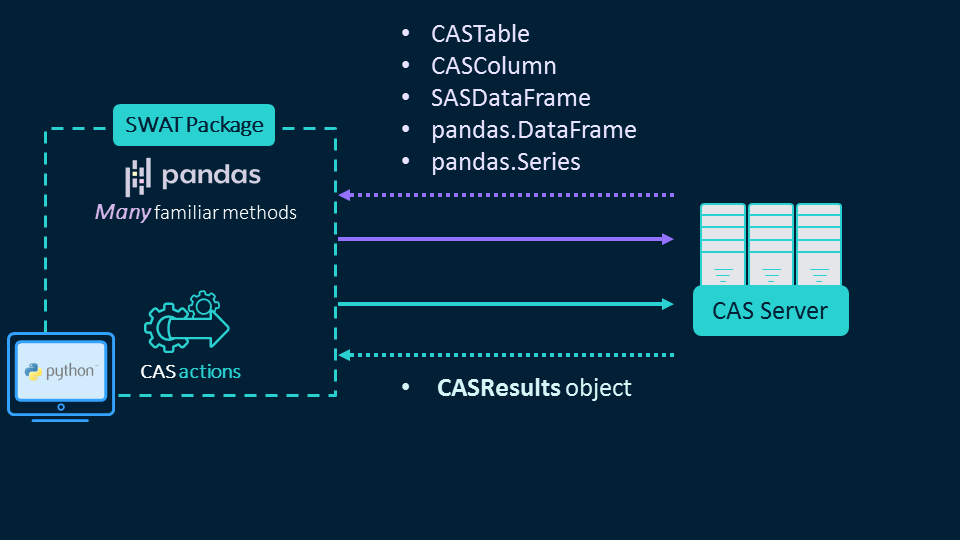

In [35]:
display_image('12a_swat_objects.png')

Because the SWAT package tries to blend the world of Pandas and CAS into a single world, you have to be aware of whether you are calling a CAS action or a Pandas API method from the SWAT package because the objects returned to the client will differ.

When you execute Pandas methods from the SWAT package, CAS can return a variety of objects to the client, such as a  CASTable, CASColumn, SASDataFrame, pandas.DataFrame, or pandas.Series.

When you execute a CAS action, CAS always returns a CASResults object (Python dictionary) to the Python client. 


#### CASTable object
CASTable objects and DataFrame objects (either pandas.DataFrame or SASDataFrame) act very similar in many ways, but they are extremely different constructs. CASTable objects do not contain actual data. They are simply a client-side view of the data in a CAS table on a CAS server. DataFrames and SASDataFrames contain data in-memory on the client machine.

In [36]:
type(castbl)

swat.cas.table.CASTable

In [37]:
castbl

CASTable('WARRANTY_DEMO', caslib='casuser')

#### SASDataFrame object
The SASDataFrame object is a simple subclass of pandas.DataFrame and local to the client. It merely adds attributes to hold SAS metadata such as titles, labels, column metadata, etc. It also adds a few utility methods for handling By group representations.

In [38]:
df = castbl.head()

display(type(df), df)

swat.dataframe.SASDataFrame

,claim_attribute_1,seller_attribute_5,product_attribute_1,product_attribute_2,product_attribute_3,product_attribute_4,product_attribute_5,customer_attribute_1,x_product_attribute7,x_product_attribute9,srvc_prvdr_attribute_1,srvc_prvdr_attribute_4,srvc_prvdr_attribute_2,srvc_prvdr_attribute_3,srvc_prvdr_attribute_5,primary_labor_group_desc,primary_labor_desc,total_claim_count,CLAIM_REPAIR_START_DT_SK,CLAIM_REPAIR_END_DT_SK,CLAIM_PROCESSED_DT_SK,CLAIM_SUBMITTED_DT_SK,PRIMARY_LABOR_CD,DEFECT_SK,PRIMARY_LABOR_GROUP_CD,PRIMARY_MATERIAL_ID,PRIMARY_MATERIAL_GROUP_CD,WARRANTY_CLAIM_ID,USAGE_VALUE,GROSS_CLAIM_AMT,GROSS_LABOR_AMT,GROSS_MATERIAL_AMT,GROSS_OTHER_AMT,PRODUCT_ID,PRODUCT_MODEL_CD,PRODUCTION_DT,IN_SERVICE_DT,SHIP_DT,SHIP_YEAR_CD,DEFECT_CD,service_provider_latitude,service_provider_longitude
0,Type 4,91.0,F1,XE,110.0,Zeus,2018.0,CANADA,8 cylinder,Charlotte,North America Commercial,Georgia,1.0,USA,D638,Engine,Cable: Cruise Control – Replace,1.0,21333.0,21336.0,21347.0,21340.0,E-500,870.0,E,6-856,6.0,C1_85809801_4V4N19TG75N374989,23965.0,97.121234,91.228732,5.892502,0.0,4V4NC9GH15N377948,Galacto,20920.0,NaN,20934.0,2017.0,,33.2598,-83.8337
1,Type 4,283.0,F1,XE,104.0,Zeus,2018.0,USA,4 cylinder,Detroit,North America Commercial,Georgia,1.0,USA,D638,Electrical,Battery – Replace,1.0,21333.0,21336.0,21347.0,21340.0,G-100,870.0,G,6-856,6.0,C1_85809801_4V4N19TG75N374989,23965.0,97.121234,91.228732,5.892502,0.0,4V4N19TG75N374989,Galacto,20920.0,20951.0,20934.0,2017.0,,33.2598,-83.8337
2,Type 4,49.0,I1,XE,110.0,Zeus,2016.0,USA,4 cylinder,Pittsburgh,North America Commercial,Georgia,1.0,USA,D638,Transmission,Lever: Man Trns Shift Equalzr,1.0,21300.0,21303.0,21312.0,21307.0,D-003,870.0,D,7-129,7.0,C1_12730601_4V4NC9TH53N336841,48462.0,86.155363,80.933572,5.221791,0.0,4V4NC9TH53N336841,Galacto,20208.0,NaN,20222.0,2015.0,,33.2598,-83.8337
3,Type 4,49.0,J1,XE,110.0,Zeus,2017.0,USA,8 cylinder,Detroit,North America Commercial,Georgia,1.0,USA,D551,Electrical,Battery – Replace,1.0,21274.0,21277.0,21287.0,21281.0,G-100,870.0,G,7-328,7.0,C1_10018401_4V4NC9GH54N351397,22774.0,39.486999,34.040302,5.446697,0.0,4V4NC9GH54N351397,Galacto,20858.0,20893.0,20872.0,2017.0,,33.2598,-83.8337
4,Type 4,49.0,I1,XE,110.0,Zeus,2016.0,USA,4 cylinder,Pittsburgh,North America Commercial,Georgia,1.0,USA,D547,Transmission,Linkage: Shift - Adjust,1.0,21327.0,21330.0,21334.0,21334.0,D-001,870.0,D,4-623,4.0,C1_15415501_4V4NC9TH33N337387,39578.0,101.389859,95.610367,5.779491,0.0,4V4NC9TH33N337387,Galacto,20385.0,20419.0,20399.0,2015.0,,33.2598,-83.8337


#### CASResults object
The output of all CAS actions is a CASResults object. This is a Python ordered dictionary with a few methods added to assist in handling the output keys, and attributes added to report information from the CAS action.

In [39]:
cr = castbl.fetch(to = 5)

display(type(cr), cr)

swat.cas.results.CASResults

,claim_attribute_1,seller_attribute_5,product_attribute_1,product_attribute_2,product_attribute_3,product_attribute_4,product_attribute_5,customer_attribute_1,x_product_attribute7,x_product_attribute9,srvc_prvdr_attribute_1,srvc_prvdr_attribute_4,srvc_prvdr_attribute_2,srvc_prvdr_attribute_3,srvc_prvdr_attribute_5,primary_labor_group_desc,primary_labor_desc,total_claim_count,CLAIM_REPAIR_START_DT_SK,CLAIM_REPAIR_END_DT_SK,CLAIM_PROCESSED_DT_SK,CLAIM_SUBMITTED_DT_SK,PRIMARY_LABOR_CD,DEFECT_SK,PRIMARY_LABOR_GROUP_CD,PRIMARY_MATERIAL_ID,PRIMARY_MATERIAL_GROUP_CD,WARRANTY_CLAIM_ID,USAGE_VALUE,GROSS_CLAIM_AMT,GROSS_LABOR_AMT,GROSS_MATERIAL_AMT,GROSS_OTHER_AMT,PRODUCT_ID,PRODUCT_MODEL_CD,PRODUCTION_DT,IN_SERVICE_DT,SHIP_DT,SHIP_YEAR_CD,DEFECT_CD,service_provider_latitude,service_provider_longitude
0,Type 4,91.0,F1,XE,110.0,Zeus,2018.0,CANADA,8 cylinder,Charlotte,North America Commercial,Georgia,1.0,USA,D638,Engine,Cable: Cruise Control – Replace,1.0,21333.0,21336.0,21347.0,21340.0,E-500,870.0,E,6-856,6.0,C1_85809801_4V4N19TG75N374989,23965.0,97.121234,91.228732,5.892502,0.0,4V4NC9GH15N377948,Galacto,20920.0,NaN,20934.0,2017.0,,33.2598,-83.8337
1,Type 4,283.0,F1,XE,104.0,Zeus,2018.0,USA,4 cylinder,Detroit,North America Commercial,Georgia,1.0,USA,D638,Electrical,Battery – Replace,1.0,21333.0,21336.0,21347.0,21340.0,G-100,870.0,G,6-856,6.0,C1_85809801_4V4N19TG75N374989,23965.0,97.121234,91.228732,5.892502,0.0,4V4N19TG75N374989,Galacto,20920.0,20951.0,20934.0,2017.0,,33.2598,-83.8337
2,Type 4,49.0,I1,XE,110.0,Zeus,2016.0,USA,4 cylinder,Pittsburgh,North America Commercial,Georgia,1.0,USA,D638,Transmission,Lever: Man Trns Shift Equalzr,1.0,21300.0,21303.0,21312.0,21307.0,D-003,870.0,D,7-129,7.0,C1_12730601_4V4NC9TH53N336841,48462.0,86.155363,80.933572,5.221791,0.0,4V4NC9TH53N336841,Galacto,20208.0,NaN,20222.0,2015.0,,33.2598,-83.8337
3,Type 4,49.0,J1,XE,110.0,Zeus,2017.0,USA,8 cylinder,Detroit,North America Commercial,Georgia,1.0,USA,D551,Electrical,Battery – Replace,1.0,21274.0,21277.0,21287.0,21281.0,G-100,870.0,G,7-328,7.0,C1_10018401_4V4NC9GH54N351397,22774.0,39.486999,34.040302,5.446697,0.0,4V4NC9GH54N351397,Galacto,20858.0,20893.0,20872.0,2017.0,,33.2598,-83.8337
4,Type 4,49.0,I1,XE,110.0,Zeus,2016.0,USA,4 cylinder,Pittsburgh,North America Commercial,Georgia,1.0,USA,D547,Transmission,Linkage: Shift - Adjust,1.0,21327.0,21330.0,21334.0,21334.0,D-001,870.0,D,4-623,4.0,C1_15415501_4V4NC9TH33N337387,39578.0,101.389859,95.610367,5.779491,0.0,4V4NC9TH33N337387,Galacto,20385.0,20419.0,20399.0,2015.0,,33.2598,-83.8337


View the keys in the CASResults object.

In [40]:
cr.keys()

odict_keys(['Fetch'])

Access the SASDataFrame from the *Fetch* key.

In [41]:
df = cr['Fetch']

display(type(df), df)

swat.dataframe.SASDataFrame

,claim_attribute_1,seller_attribute_5,product_attribute_1,product_attribute_2,product_attribute_3,product_attribute_4,product_attribute_5,customer_attribute_1,x_product_attribute7,x_product_attribute9,srvc_prvdr_attribute_1,srvc_prvdr_attribute_4,srvc_prvdr_attribute_2,srvc_prvdr_attribute_3,srvc_prvdr_attribute_5,primary_labor_group_desc,primary_labor_desc,total_claim_count,CLAIM_REPAIR_START_DT_SK,CLAIM_REPAIR_END_DT_SK,CLAIM_PROCESSED_DT_SK,CLAIM_SUBMITTED_DT_SK,PRIMARY_LABOR_CD,DEFECT_SK,PRIMARY_LABOR_GROUP_CD,PRIMARY_MATERIAL_ID,PRIMARY_MATERIAL_GROUP_CD,WARRANTY_CLAIM_ID,USAGE_VALUE,GROSS_CLAIM_AMT,GROSS_LABOR_AMT,GROSS_MATERIAL_AMT,GROSS_OTHER_AMT,PRODUCT_ID,PRODUCT_MODEL_CD,PRODUCTION_DT,IN_SERVICE_DT,SHIP_DT,SHIP_YEAR_CD,DEFECT_CD,service_provider_latitude,service_provider_longitude
0,Type 4,91.0,F1,XE,110.0,Zeus,2018.0,CANADA,8 cylinder,Charlotte,North America Commercial,Georgia,1.0,USA,D638,Engine,Cable: Cruise Control – Replace,1.0,21333.0,21336.0,21347.0,21340.0,E-500,870.0,E,6-856,6.0,C1_85809801_4V4N19TG75N374989,23965.0,97.121234,91.228732,5.892502,0.0,4V4NC9GH15N377948,Galacto,20920.0,NaN,20934.0,2017.0,,33.2598,-83.8337
1,Type 4,283.0,F1,XE,104.0,Zeus,2018.0,USA,4 cylinder,Detroit,North America Commercial,Georgia,1.0,USA,D638,Electrical,Battery – Replace,1.0,21333.0,21336.0,21347.0,21340.0,G-100,870.0,G,6-856,6.0,C1_85809801_4V4N19TG75N374989,23965.0,97.121234,91.228732,5.892502,0.0,4V4N19TG75N374989,Galacto,20920.0,20951.0,20934.0,2017.0,,33.2598,-83.8337
2,Type 4,49.0,I1,XE,110.0,Zeus,2016.0,USA,4 cylinder,Pittsburgh,North America Commercial,Georgia,1.0,USA,D638,Transmission,Lever: Man Trns Shift Equalzr,1.0,21300.0,21303.0,21312.0,21307.0,D-003,870.0,D,7-129,7.0,C1_12730601_4V4NC9TH53N336841,48462.0,86.155363,80.933572,5.221791,0.0,4V4NC9TH53N336841,Galacto,20208.0,NaN,20222.0,2015.0,,33.2598,-83.8337
3,Type 4,49.0,J1,XE,110.0,Zeus,2017.0,USA,8 cylinder,Detroit,North America Commercial,Georgia,1.0,USA,D551,Electrical,Battery – Replace,1.0,21274.0,21277.0,21287.0,21281.0,G-100,870.0,G,7-328,7.0,C1_10018401_4V4NC9GH54N351397,22774.0,39.486999,34.040302,5.446697,0.0,4V4NC9GH54N351397,Galacto,20858.0,20893.0,20872.0,2017.0,,33.2598,-83.8337
4,Type 4,49.0,I1,XE,110.0,Zeus,2016.0,USA,4 cylinder,Pittsburgh,North America Commercial,Georgia,1.0,USA,D547,Transmission,Linkage: Shift - Adjust,1.0,21327.0,21330.0,21334.0,21334.0,D-001,870.0,D,4-623,4.0,C1_15415501_4V4NC9TH33N337387,39578.0,101.389859,95.610367,5.779491,0.0,4V4NC9TH33N337387,Galacto,20385.0,20419.0,20399.0,2015.0,,33.2598,-83.8337


### d. Rename columns, drop columns, format date columns

Get the name of all the CAS table columns.

In [42]:
castableColumnNames = castbl.columns.to_list()
castableColumnNames

['claim_attribute_1',
 'seller_attribute_5',
 'product_attribute_1',
 'product_attribute_2',
 'product_attribute_3',
 'product_attribute_4',
 'product_attribute_5',
 'customer_attribute_1',
 'x_product_attribute7',
 'x_product_attribute9',
 'srvc_prvdr_attribute_1',
 'srvc_prvdr_attribute_4',
 'srvc_prvdr_attribute_2',
 'srvc_prvdr_attribute_3',
 'srvc_prvdr_attribute_5',
 'primary_labor_group_desc',
 'primary_labor_desc',
 'total_claim_count',
 'CLAIM_REPAIR_START_DT_SK',
 'CLAIM_REPAIR_END_DT_SK',
 'CLAIM_PROCESSED_DT_SK',
 'CLAIM_SUBMITTED_DT_SK',
 'PRIMARY_LABOR_CD',
 'DEFECT_SK',
 'PRIMARY_LABOR_GROUP_CD',
 'PRIMARY_MATERIAL_ID',
 'PRIMARY_MATERIAL_GROUP_CD',
 'WARRANTY_CLAIM_ID',
 'USAGE_VALUE',
 'GROSS_CLAIM_AMT',
 'GROSS_LABOR_AMT',
 'GROSS_MATERIAL_AMT',
 'GROSS_OTHER_AMT',
 'PRODUCT_ID',
 'PRODUCT_MODEL_CD',
 'PRODUCTION_DT',
 'IN_SERVICE_DT',
 'SHIP_DT',
 'SHIP_YEAR_CD',
 'DEFECT_CD',
 'service_provider_latitude',
 'service_provider_longitude']

Specify the new column names as a list.

In [43]:
newColumnNames = [
            'campaign_type','selling_dealer','vehicle_class','platform','trim_level','make','model_year','customer_country','engine_model',
            'vehicle_assembly_plant','repairing_division','repairing_state_province','repairing_region','repairing_country','repairing_dealer',
            'primary_labor_group','primary_labor_description','total_claim_count','claim_repair_start_date','claim_repair_end_date','claim_processed_date',
            'claim_submitted_date','primary_labor_code','defect_key','primary_labor_group_code','primary_replaced__material_id',
            'primary_replaced_material_group_code','warranty_claim_id','usage_value','gross_claim_amount','gross_labor_amount','gross_material_amount',
            'gross_other_amount','product_unit_id','product_model','product_unit_assembly_date','service_year_date','ship_date','ship_year','defect_code',
            'latitude','longitude'
]

Create a list of dictionaries to rename the columns in the CAS table.

In [44]:
updateColumns = []

## Create a list of dictionaries. Each dictionary specifies the current column name, and the name to rename it to. Add date formats to date columns
for position in range(len(castableColumnNames)):
    
    # Rename columns
    colUpdate = {'name' : castableColumnNames[position], 'rename' : newColumnNames[position]}
    
    # # Add date format to date columns
    if colUpdate['rename'].find('date') > 0:
        colUpdate['format'] = 'DATE9.'
        
    # Append dictionaries to list
    updateColumns.append(colUpdate)
    
updateColumns

[{'name': 'claim_attribute_1', 'rename': 'campaign_type'},
 {'name': 'seller_attribute_5', 'rename': 'selling_dealer'},
 {'name': 'product_attribute_1', 'rename': 'vehicle_class'},
 {'name': 'product_attribute_2', 'rename': 'platform'},
 {'name': 'product_attribute_3', 'rename': 'trim_level'},
 {'name': 'product_attribute_4', 'rename': 'make'},
 {'name': 'product_attribute_5', 'rename': 'model_year'},
 {'name': 'customer_attribute_1', 'rename': 'customer_country'},
 {'name': 'x_product_attribute7', 'rename': 'engine_model'},
 {'name': 'x_product_attribute9', 'rename': 'vehicle_assembly_plant'},
 {'name': 'srvc_prvdr_attribute_1', 'rename': 'repairing_division'},
 {'name': 'srvc_prvdr_attribute_4', 'rename': 'repairing_state_province'},
 {'name': 'srvc_prvdr_attribute_2', 'rename': 'repairing_region'},
 {'name': 'srvc_prvdr_attribute_3', 'rename': 'repairing_country'},
 {'name': 'srvc_prvdr_attribute_5', 'rename': 'repairing_dealer'},
 {'name': 'primary_labor_group_desc', 'rename': 'pri

Specify a list of columns to drop.

In [45]:
dropColumns = ['defect_code','repairing_division','usage_value','campaign_type','customer_country','ship_year',
               'product_unit_assembly_date','primary_replaced_material_group_code','primary_labor_group_code',
               'selling_dealer','vehicle_class','ship_date', 'total_claim_count']

Use the [alterTable](https://go.documentation.sas.com/doc/en/pgmsascdc/default/caspg/cas-table-altertable.htm) CAS action to rename, drop and rearrange columns.

In [46]:
castbl.alterTable(columns = updateColumns, 
                  drop = dropColumns)

+ Elapsed: 0.00937s, user: 0.0134s, sys: 0.00571s, mem: 2.37mb

Return a tuple representing the dimensionality of the CASTable.

In [47]:
castbl.shape

(153217, 29)

Preview the 5 rows of the CAS table.

In [48]:
castbl.head()

,platform,trim_level,make,model_year,engine_model,vehicle_assembly_plant,repairing_state_province,repairing_region,repairing_country,repairing_dealer,primary_labor_group,primary_labor_description,claim_repair_start_date,claim_repair_end_date,claim_processed_date,claim_submitted_date,primary_labor_code,defect_key,primary_replaced__material_id,warranty_claim_id,gross_claim_amount,gross_labor_amount,gross_material_amount,gross_other_amount,product_unit_id,product_model,service_year_date,latitude,longitude
0,XE,110.0,Zeus,2018.0,8 cylinder,Charlotte,Georgia,1.0,USA,D638,Engine,Cable: Cruise Control – Replace,2018-05-29,2018-06-01,2018-06-12,2018-06-05,E-500,870.0,6-856,C1_85809801_4V4N19TG75N374989,97.121234,91.228732,5.892502,0.0,4V4NC9GH15N377948,Galacto,NaT,33.2598,-83.8337
1,XE,104.0,Zeus,2018.0,4 cylinder,Detroit,Georgia,1.0,USA,D638,Electrical,Battery – Replace,2018-05-29,2018-06-01,2018-06-12,2018-06-05,G-100,870.0,6-856,C1_85809801_4V4N19TG75N374989,97.121234,91.228732,5.892502,0.0,4V4N19TG75N374989,Galacto,2017-05-12,33.2598,-83.8337
2,XE,110.0,Zeus,2016.0,4 cylinder,Pittsburgh,Georgia,1.0,USA,D638,Transmission,Lever: Man Trns Shift Equalzr,2018-04-26,2018-04-29,2018-05-08,2018-05-03,D-003,870.0,7-129,C1_12730601_4V4NC9TH53N336841,86.155363,80.933572,5.221791,0.0,4V4NC9TH53N336841,Galacto,NaT,33.2598,-83.8337
3,XE,110.0,Zeus,2017.0,8 cylinder,Detroit,Georgia,1.0,USA,D551,Electrical,Battery – Replace,2018-03-31,2018-04-03,2018-04-13,2018-04-07,G-100,870.0,7-328,C1_10018401_4V4NC9GH54N351397,39.486999,34.040302,5.446697,0.0,4V4NC9GH54N351397,Galacto,2017-03-15,33.2598,-83.8337
4,XE,110.0,Zeus,2016.0,4 cylinder,Pittsburgh,Georgia,1.0,USA,D547,Transmission,Linkage: Shift - Adjust,2018-05-23,2018-05-26,2018-05-30,2018-05-30,D-001,870.0,4-623,C1_15415501_4V4NC9TH33N337387,101.389859,95.610367,5.779491,0.0,4V4NC9TH33N337387,Galacto,2015-11-27,33.2598,-83.8337


Rearrange the CAS table column order.

In [49]:
## Specify the new column order
newColumnOrder = ['warranty_claim_id', 'make', 'product_model', 'model_year', 'platform', 'trim_level', 'engine_model','vehicle_assembly_plant',
                  'primary_labor_group', 'primary_labor_description', 'primary_labor_code', 'defect_key','primary_replaced__material_id', 'gross_claim_amount', 
                  'gross_labor_amount', 'gross_material_amount', 'gross_other_amount','product_unit_id', 'repairing_state_province', 'repairing_region', 
                  'repairing_country', 'repairing_dealer', 'latitude', 'longitude', 'claim_repair_start_date', 'claim_repair_end_date', 'claim_processed_date', 
                  'claim_submitted_date','service_year_date']

## Rearrange the columns in the CAS table
castbl.alterTable(columnOrder = newColumnOrder)

## Preview the new CAS table
castbl.head()

,warranty_claim_id,make,product_model,model_year,platform,trim_level,engine_model,vehicle_assembly_plant,primary_labor_group,primary_labor_description,primary_labor_code,defect_key,primary_replaced__material_id,gross_claim_amount,gross_labor_amount,gross_material_amount,gross_other_amount,product_unit_id,repairing_state_province,repairing_region,repairing_country,repairing_dealer,latitude,longitude,claim_repair_start_date,claim_repair_end_date,claim_processed_date,claim_submitted_date,service_year_date
0,C1_85809801_4V4N19TG75N374989,Zeus,Galacto,2018.0,XE,110.0,8 cylinder,Charlotte,Engine,Cable: Cruise Control – Replace,E-500,870.0,6-856,97.121234,91.228732,5.892502,0.0,4V4NC9GH15N377948,Georgia,1.0,USA,D638,33.2598,-83.8337,2018-05-29,2018-06-01,2018-06-12,2018-06-05,NaT
1,C1_85809801_4V4N19TG75N374989,Zeus,Galacto,2018.0,XE,104.0,4 cylinder,Detroit,Electrical,Battery – Replace,G-100,870.0,6-856,97.121234,91.228732,5.892502,0.0,4V4N19TG75N374989,Georgia,1.0,USA,D638,33.2598,-83.8337,2018-05-29,2018-06-01,2018-06-12,2018-06-05,2017-05-12
2,C1_12730601_4V4NC9TH53N336841,Zeus,Galacto,2016.0,XE,110.0,4 cylinder,Pittsburgh,Transmission,Lever: Man Trns Shift Equalzr,D-003,870.0,7-129,86.155363,80.933572,5.221791,0.0,4V4NC9TH53N336841,Georgia,1.0,USA,D638,33.2598,-83.8337,2018-04-26,2018-04-29,2018-05-08,2018-05-03,NaT
3,C1_10018401_4V4NC9GH54N351397,Zeus,Galacto,2017.0,XE,110.0,8 cylinder,Detroit,Electrical,Battery – Replace,G-100,870.0,7-328,39.486999,34.040302,5.446697,0.0,4V4NC9GH54N351397,Georgia,1.0,USA,D551,33.2598,-83.8337,2018-03-31,2018-04-03,2018-04-13,2018-04-07,2017-03-15
4,C1_15415501_4V4NC9TH33N337387,Zeus,Galacto,2016.0,XE,110.0,4 cylinder,Pittsburgh,Transmission,Linkage: Shift - Adjust,D-001,870.0,4-623,101.389859,95.610367,5.779491,0.0,4V4NC9TH33N337387,Georgia,1.0,USA,D547,33.2598,-83.8337,2018-05-23,2018-05-26,2018-05-30,2018-05-30,2015-11-27


## 4. Exploratory data analysis

### a. Distinct and missing values

View the unique values of a column.

In [50]:
castbl.make.unique()

array(['Apollo', 'Ares', 'Titan', 'Zeus'], dtype=object)

Use the [distinct](https://go.documentation.sas.com/doc/en/pgmsascdc/v_035/casanpg/cas-simple-distinct.htm) CAS action to compute the distinct and missing number of values of the columns.

In [51]:
distinct_df = castbl.distinct()['Distinct']

display(type(distinct_df),distinct_df)

swat.dataframe.SASDataFrame

,Column,NDistinct,NMiss,Trunc
0,warranty_claim_id,144681.0,0.0,0.0
1,make,4.0,0.0,0.0
2,product_model,21.0,0.0,0.0
3,model_year,5.0,0.0,0.0
4,platform,2.0,0.0,0.0
5,trim_level,60.0,0.0,0.0
6,engine_model,4.0,0.0,0.0
7,vehicle_assembly_plant,3.0,0.0,0.0
8,primary_labor_group,8.0,0.0,0.0
9,primary_labor_description,80.0,0.0,0.0


A SASDataFrame is a subclass of pandas DataFrame. Therefore, anything you can do with a pandas DataFrame will also work with SASDataFrame. SASDataFrames are local on the client.

Create the **pctDistinct** and **pctMissing** columns using traditional pandas code.

In [52]:
## Number of rows in the CAS table
nRows = castbl.shape[0]

## Pandas code on the Python client to prepare the SASDataFrame
distinct_df = (distinct_df                                                 
               .assign(pctDistinct = distinct_df.NDistinct / nRows,
                       pctMissing = distinct_df.NMiss / nRows)
               .sort_values('pctDistinct', ascending = False)
               .drop('Trunc', axis = 1)
              )

distinct_df

,Column,NDistinct,NMiss,pctDistinct,pctMissing
0,warranty_claim_id,144681.0,0.0,0.944288,0.000000
13,gross_claim_amount,141891.0,0.0,0.926079,0.000000
14,gross_labor_amount,130643.0,0.0,0.852666,0.000000
15,gross_material_amount,106474.0,0.0,0.694923,0.000000
16,gross_other_amount,35288.0,0.0,0.230314,0.000000
17,product_unit_id,30679.0,0.0,0.200232,0.000000
12,primary_replaced__material_id,10000.0,0.0,0.065267,0.000000
26,claim_processed_date,1215.0,0.0,0.007930,0.000000
27,claim_submitted_date,1199.0,0.0,0.007826,0.000000
25,claim_repair_end_date,1196.0,0.0,0.007806,0.000000


Plot the percentage of missing and distinct values using pandas on the client.

,pctMissing
Column,
service_year_date,0.412069


,pctDistinct
Column,
warranty_claim_id,0.944288
gross_claim_amount,0.926079
gross_labor_amount,0.852666
gross_material_amount,0.694923
gross_other_amount,0.230314
product_unit_id,0.200232


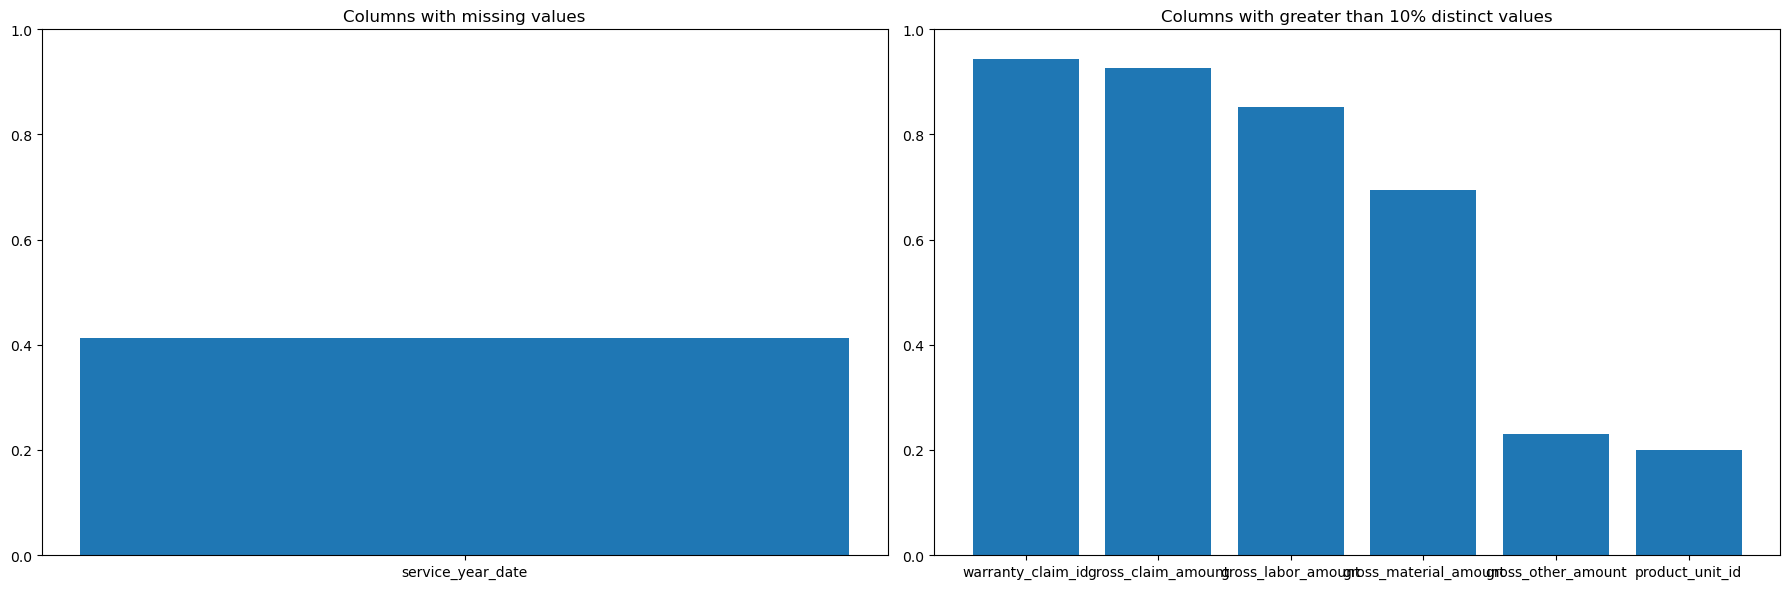

In [53]:
##
## Create the dataframes for the pctMissing and pctDistinct
##

## Missing columns dataframe
missing = (distinct_df
           .query('pctMissing > 0')
           .loc[:,['Column', 'pctMissing']]
           .set_index('Column')
          )

## Distinct columns over 10% distinct values dataframe
distinct_gt10 = (distinct_df
                 .query('pctDistinct > .1')
                 .loc[:,['Column','pctDistinct']]
                 .set_index('Column')
                )

display(missing, distinct_gt10)


##
## Plot the dataframes
##

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (18,6))

ax1.bar(missing.index, missing.pctMissing)
ax1.set_title('Columns with missing values')
ax1.set_ylim(top=1)

ax2.bar(distinct_gt10.index, distinct_gt10.pctDistinct)
ax2.set_title('Columns with greater than 10% distinct values')
ax2.set_ylim(top=1)

fig.tight_layout()

### b. Categorical columns

The SWAT packages contains a variety of Pandas API methods.

Use the value_counts method to return a Series containing the frequency of each distinct row in the CAS table.

In [54]:
(castbl                               ## CAS table
 .make                                ## CAS table column
 .value_counts(normalize = True)      ## value_count swat method
)

Zeus      0.895221
Titan     0.095185
Ares      0.005783
Apollo    0.003812
dtype: float64

Get unique value counts of each of the following CAS table columns.

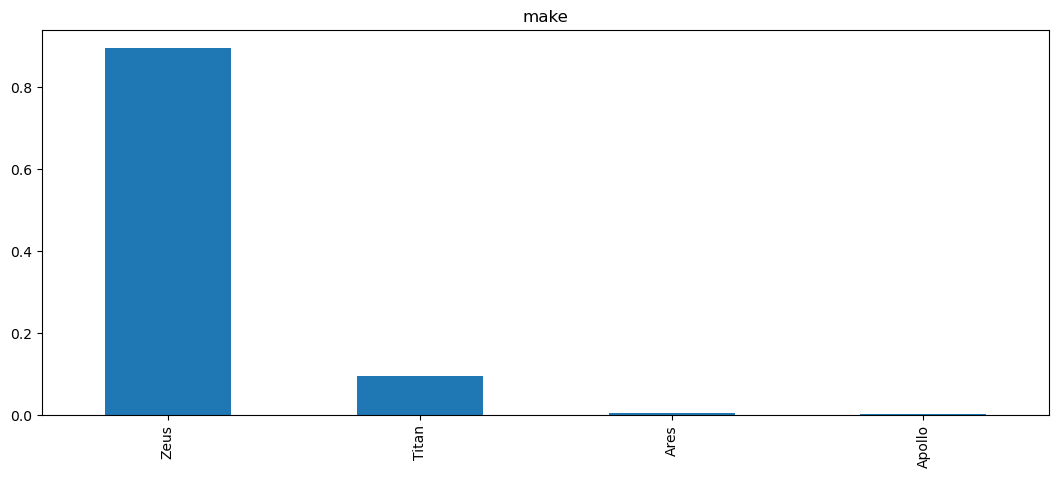

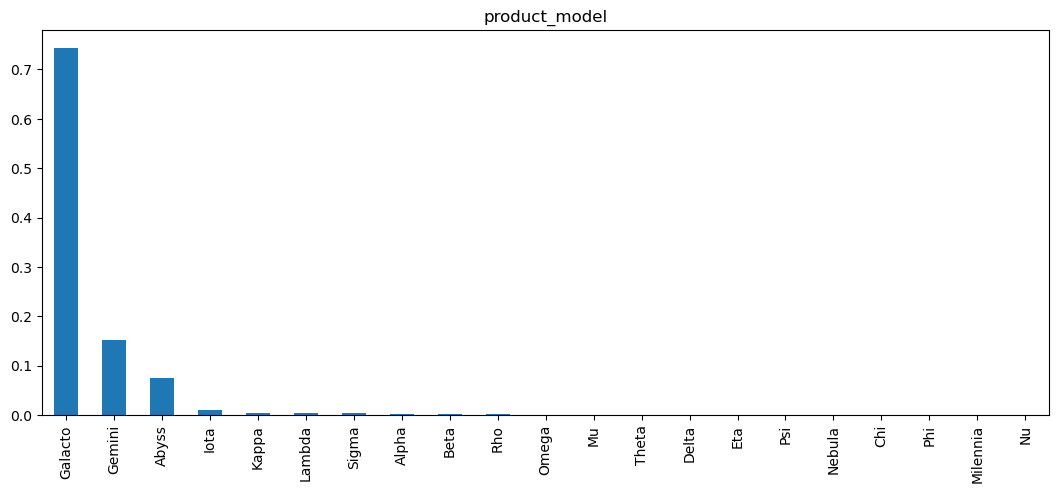

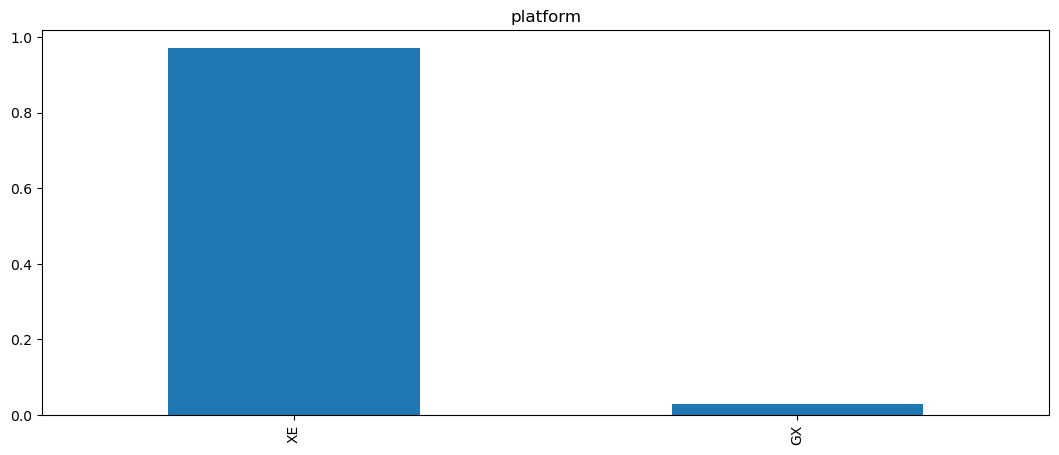

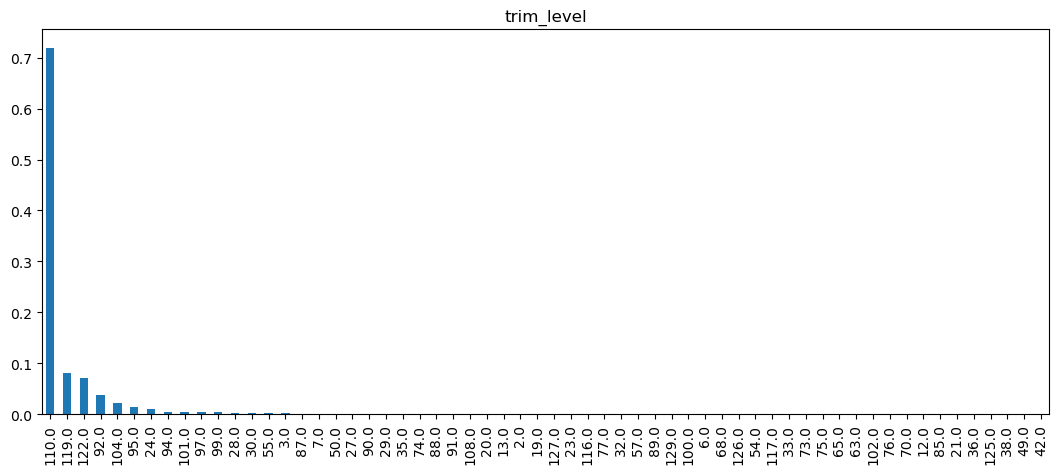

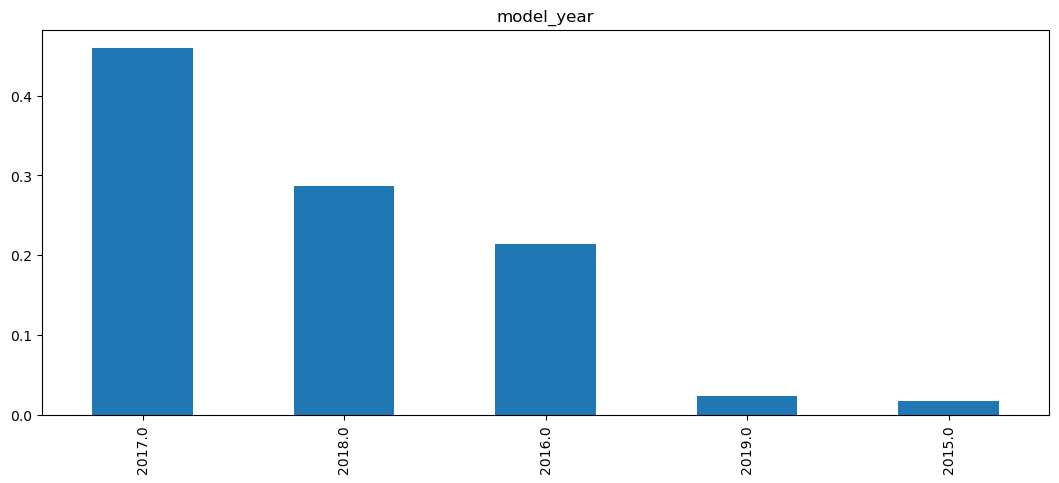

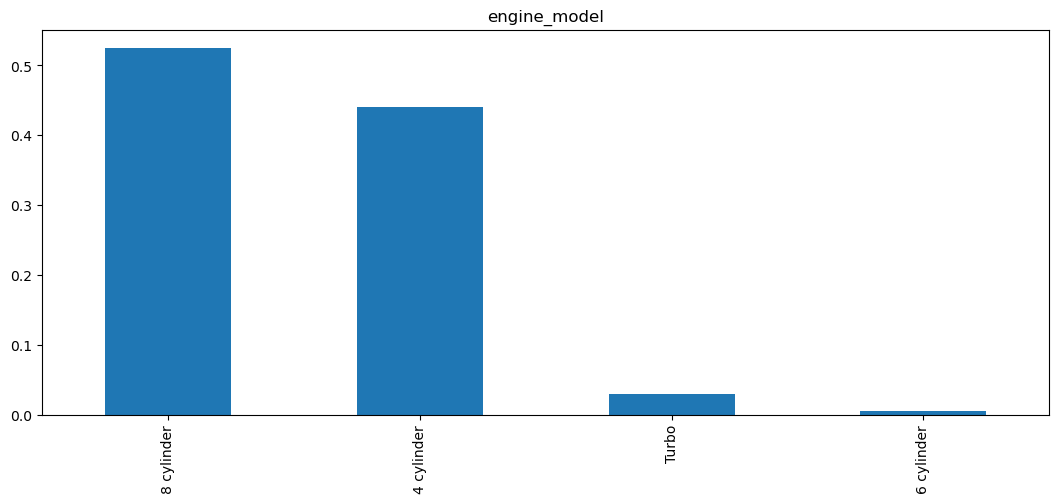

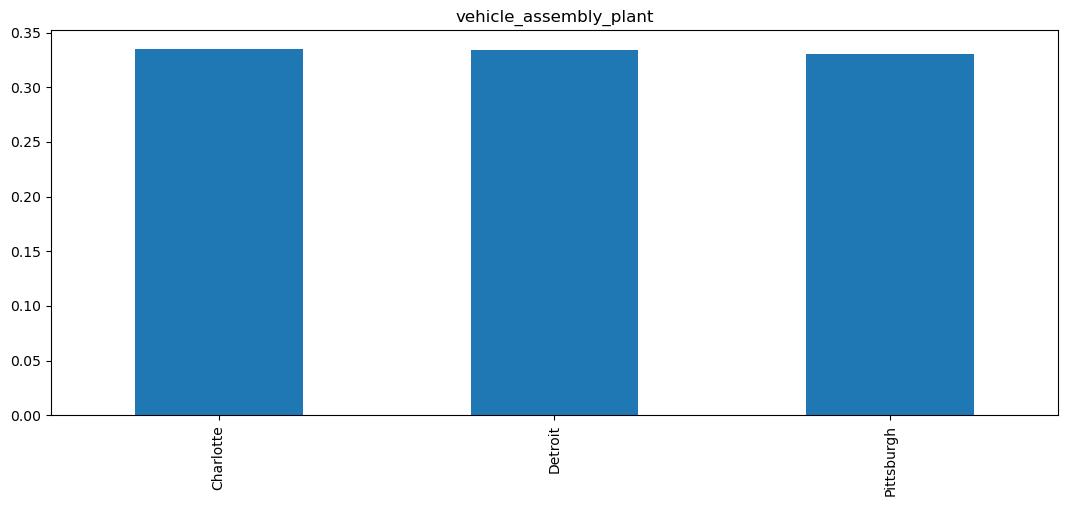

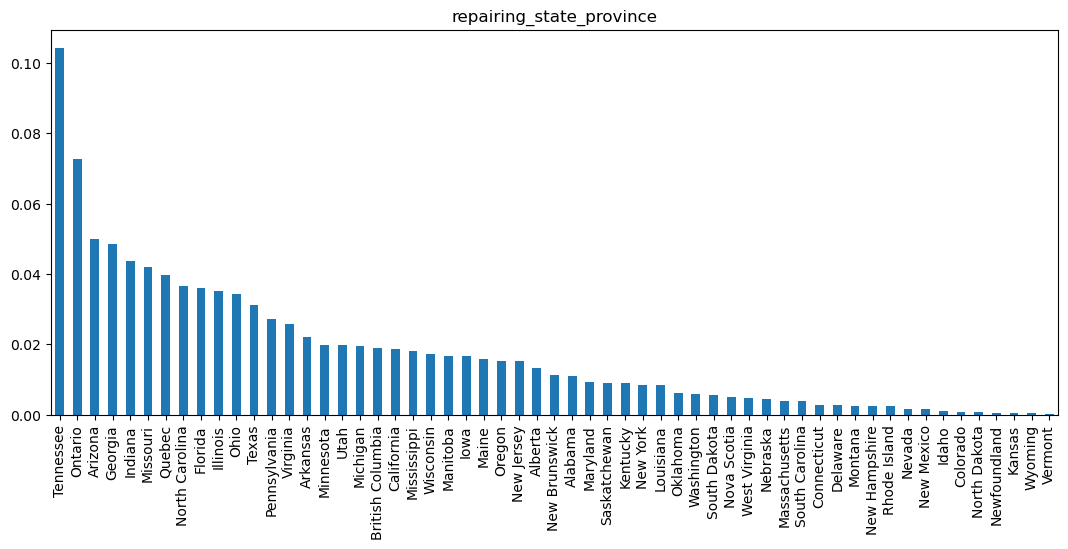

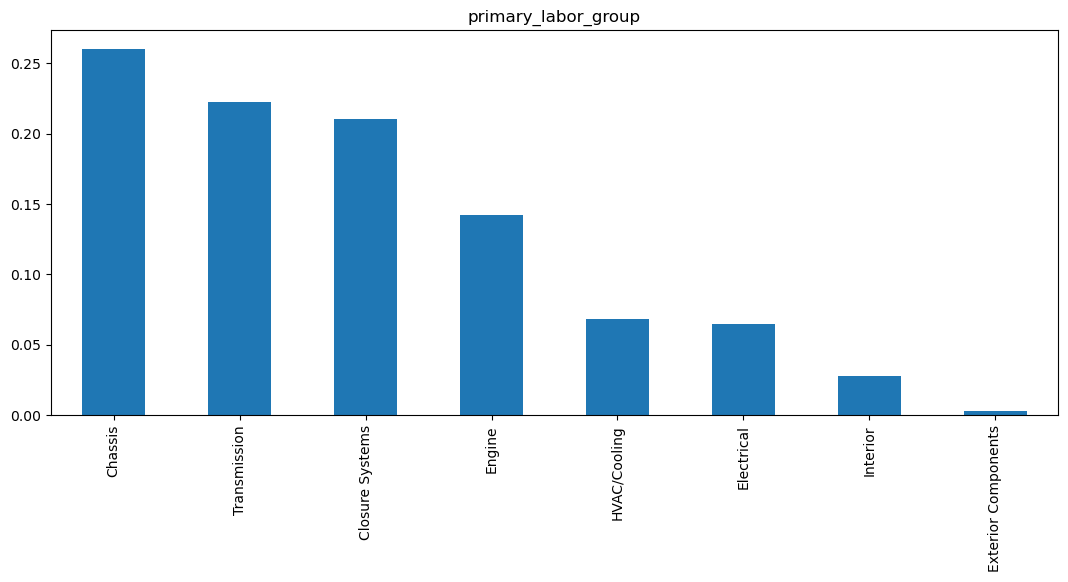

In [55]:
catColumns = ['make', 'product_model', 'platform', 'trim_level', 'model_year', 'engine_model', 'vehicle_assembly_plant', 'repairing_state_province','primary_labor_group']

for col in catColumns:
    (castbl[col]                                            ## CAS table column
     .value_counts(normalize = True)                        ## value_count swat method, summarizes the data in the distributed CAS server
     .plot(kind = 'bar', title = col, figsize = (13,5))     ## Plot the SASDataFrame on the client-side using pandas
    )
    plt.show()

Pull information out of the **primary_labor_description** column. View the detailed labor descriptions of the top 20 claims.

In [56]:
(castbl                              ## CAS table 
 .primary_labor_description          ## CAS table column
 .value_counts(normalize = True)     ## SWAT value_counts method to process data on the distributed CAS server
 .iloc[:20]                          ## Subset the Series on the client using pandas
)

Cable: Cruise Control – Replace                    0.046379
Seal/Boot: Floor Gearshift - Replace               0.028313
Battery – Replace                                  0.028169
Lever: Man Trns Shift Equalzr                      0.028084
Plate: Floor Gearshift Trim - Replace              0.027836
Cable: Shift - Replace                             0.027823
Lever: Gearshift Ctl - Replace                     0.027725
Knob: Gearshift Lever - Repair/Replace             0.027699
Flywheel: Automatic Trans - Replace                0.027530
Linkage: Shift - Adjust                            0.027530
Strut: Both Rear - Replace                         0.026492
Bushings: Rr Suspn Crossmember - Replace           0.026414
Actuator: Rt Rear Select Ride - Replace            0.026335
Damper: Rear Brake Vibration - Repair/Replace      0.026139
Mount: Rear Axle Cradle Right - Replace            0.026113
Crossmember Asm: Rr Suspension - Repair/Replace    0.026113
Dampening Package Right - Install       

View the CASTable object.

In [57]:
castbl

CASTable('WARRANTY_DEMO', caslib='casuser')

Add parameters to a CASTable object to calculate a new column. Notice the output adds how to calculate the new column to the CASTable object. No column has been created.

**The eval method enables you to use [SAS functions](https://go.documentation.sas.com/doc/en/pgmsascdc/default/lefunctionsref/p1q8bq2v0o11n6n1gpij335fqpph.htm) and assignment statements to create columns.**

In [58]:
castbl.eval("primary_labor_item = scan(primary_labor_description,1,'–:-','r')", inplace = False).params

{'name': 'WARRANTY_DEMO',
 'caslib': 'casuser',
 'computedvars': ['primary_labor_item'],
 'computedvarsprogram': "primary_labor_item =  scan(primary_labor_description,1,'–:-','r'); primary_labor_item = primary_labor_item; "}

View the original CASTable object.

In [59]:
castbl

CASTable('WARRANTY_DEMO', caslib='casuser')

Create a new column in the CAS table and summarizes the unique counts.

In [60]:
(castbl
 .eval("primary_labor_item = scan(primary_labor_description,1,'–:-','r')", inplace = False)
 .primary_labor_item
 .value_counts(normalize = True)
)

Cable                            0.074202
Latch                            0.062748
Lever                            0.055810
Module                           0.046209
Seal                             0.042189
Relay                            0.040818
Plate                            0.030597
Seal/Boot                        0.028313
Battery                          0.028169
Knob                             0.027699
Flywheel                         0.027530
Linkage                          0.027530
Strut                            0.026492
Bushings                         0.026414
Actuator                         0.026335
Damper                           0.026139
Crossmember Asm                  0.026113
Mount                            0.026113
Dampening Package Right          0.025983
Mount Assembly                   0.025565
Shock Absorber                   0.025526
Spring                           0.021877
Lock & Bolt Assembly             0.021016
Striker                          0

View the CASTable object. Notice it still references the CAS table with no additional parameters.

In [61]:
castbl

CASTable('WARRANTY_DEMO', caslib='casuser')

### c. Numeric columns

Generate descriptive statistics of a CAS table using the Pandas API from the SWAT package.

In [62]:
numericColumns = ['gross_claim_amount', 'gross_labor_amount', 'gross_material_amount', 'gross_other_amount']

(castbl                       ## CAS table
 .loc[:,numericColumns]       ## CAS table columns
 .describe()                  ## swat describe method, processes in the CAS server
)

,gross_claim_amount,gross_labor_amount,gross_material_amount,gross_other_amount
count,153217.000000,153217.000000,153217.000000,153217.000000
mean,540.225731,184.149760,330.067235,26.008735
std,1375.949840,288.125026,1241.841830,161.888485
min,0.000000,0.000000,0.000000,0.000000
25%,111.988329,62.366981,0.000000,0.000000
50%,208.895870,118.853158,39.035339,0.000000
75%,439.881829,214.006799,168.183010,0.000000
max,75292.757377,14134.469857,70035.052932,16688.276805


### d. Date columns

Calculate the **days_to_repair** and **days_to_process_claim** columns.

In [63]:
(castbl
 .eval("days_to_repair = claim_repair_end_date - claim_repair_start_date", inplace = False)
 .eval("days_to_process_claim = claim_processed_date - claim_submitted_date", inplace = False)
 .loc[:, ['days_to_repair', 'days_to_process_claim']]
 .describe()
)

,days_to_repair,days_to_process_claim
count,153217.000000,153217.000000
mean,3.043527,4.553176
std,0.542297,2.925297
min,0.000000,0.000000
25%,3.000000,2.000000
50%,3.000000,4.000000
75%,3.000000,7.000000
max,10.000000,11.000000


## 5. Prepare final data

### a. Using Python

Confirm the castbl variable references the CAS WARRANTY_DEMO CAS table.

In [64]:
castbl

CASTable('WARRANTY_DEMO', caslib='casuser')

In [65]:
castbl.tableInfo()

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,WARRANTY_DEMO,153217,29,0,utf-8,2023-09-19T13:42:06+00:00,2023-09-19T13:43:26+00:00,2023-09-19T13:44:13+00:00,UTF8,2.010750e+09,2.010750e+09,2.010750e+09,0,0,0,0,warranty_demo.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-09-19T13:40:52+00:00,2.010750e+09


**NOTE: If you are using SAS Viya for Learners 3.5 you must use the partition action instead of copyTable.**

**SAS Viya**
Create the following columns in the CAS table **WARRANTY_FINAL**:
- **days_to_repair**
- **days_to_process_claim**
- **primary_labor_item**
- **car_serviced**

In [66]:
(castbl
 .eval("days_to_repair = claim_repair_end_date - claim_repair_start_date", inplace = False)
 .eval("days_to_process_claim = claim_processed_date - claim_submitted_date", inplace = False)
 .eval("primary_labor_item = scan(primary_labor_description,1,'–:-','r')", inplace = False)
 .eval("car_serviced = ifc(service_year_date = ., 'Not Serviced', 'Serviced')", inplace = False)
 .copyTable(casout = {'name':'warranty_final', 
                      'caslib':'casuser', 
                      'replace':True})          
)

[caslib]

 'CASUSER(Peter.Styliadis@sas.com)'

[tableName]

 'WARRANTY_FINAL'

[casTable]

 CASTable('WARRANTY_FINAL', caslib='CASUSER(Peter.Styliadis@sas.com)')

+ Elapsed: 0.145s, user: 0.842s, sys: 0.736s, mem: 747mb

**SAS Viya for Learners 3.5**

In [59]:
#################################################################################################
## Use the following code if you are using SAS Viya for Learners (Viya 3.5)                    ##
## In SAS Viya 3.5 you must use the partition action instead of copyTable. Code is similar.    ##
#################################################################################################
# (castbl
#  .eval("days_to_repair = claim_repair_end_date - claim_repair_start_date", inplace = False)
#  .eval("days_to_process_claim = claim_processed_date - claim_submitted_date", inplace = False)
#  .eval("primary_labor_item = scan(primary_labor_description,1,'–:-','r')", inplace = False)
#  .eval("car_serviced = ifc(service_year_date = ., 'Not Serviced', 'Serviced')", inplace = False)
#  .partition(casout = {'name':'warranty_final', 'caslib':'casuser', 'replace':True})          ## In SAS Viya 3.5 you must use the partition action instead of copyTable. Code is similar.
# )

Confirm the **WARRANTY_FINAL** CAS table was created.

In [67]:
conn.tableInfo(caslib = 'casuser')

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,WARRANTY_DEMO,153217,29,0,utf-8,2023-09-19T13:42:06+00:00,2023-09-19T13:43:26+00:00,2023-09-19T13:44:35+00:00,UTF8,2.010750e+09,2.010750e+09,2.010750e+09,0,0,0,0,warranty_demo.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-09-19T13:40:52+00:00,2.010750e+09
1,WARRANTY_FINAL,153217,33,0,utf-8,2023-09-19T13:44:35+00:00,2023-09-19T13:44:35+00:00,2023-09-19T13:44:35+00:00,UTF8,2.010750e+09,2.010750e+09,2.010750e+09,0,0,0,0,,,0,Peter.Styliadis@sas.com,,,NaN


Reference the new **WARRANTY_FINAL** CAS table.

In [68]:
finalTbl = conn.CASTable('WARRANTY_FINAL', caslib = 'casuser')
finalTbl.head()

,warranty_claim_id,make,product_model,model_year,platform,trim_level,engine_model,vehicle_assembly_plant,primary_labor_group,primary_labor_description,primary_labor_code,defect_key,primary_replaced__material_id,gross_claim_amount,gross_labor_amount,gross_material_amount,gross_other_amount,product_unit_id,repairing_state_province,repairing_region,repairing_country,repairing_dealer,latitude,longitude,claim_repair_start_date,claim_repair_end_date,claim_processed_date,claim_submitted_date,service_year_date,days_to_repair,days_to_process_claim,primary_labor_item,car_serviced
0,C1_00797404_4V4NC9TG54N356290,Zeus,Galacto,2017.0,XE,110.0,4 cylinder,Charlotte,Electrical,Battery – Replace,G-100,786.0,9-522,87.426377,87.426377,0.0,0.0,4V4NC9TG54N356290,Mississippi,1.0,USA,D022,32.5631,-89.6087,2017-04-25,2017-04-28,2017-05-06,2017-05-02,2016-06-28,3.0,4.0,Battery,Serviced
1,C1_00803803_4V4NC9GH64N355670,Zeus,Galacto,2017.0,XE,110.0,8 cylinder,Charlotte,Electrical,Battery – Replace,G-100,786.0,4-986,124.433611,124.433611,0.0,0.0,4V4NC9GH64N355670,Mississippi,1.0,USA,D101,32.5631,-89.6087,2017-04-27,2017-04-30,2017-05-04,2017-05-04,NaT,3.0,0.0,Battery,Not Serviced
2,C1_50938501_4V4NC9GF02N337502,Zeus,Galacto,2015.0,XE,110.0,8 cylinder,Charlotte,Engine,Cable: Cruise Control – Replace,E-500,786.0,9-761,701.135711,701.135711,0.0,0.0,4V4NC9GF02N337502,Minnesota,1.0,USA,D976,45.2213,-93.6086,2015-05-30,2015-06-02,2015-06-14,2015-06-06,NaT,3.0,8.0,Cable,Not Serviced
3,C1_51422203_4V4NC9GH92N337872,Zeus,Galacto,2015.0,XE,110.0,8 cylinder,Pittsburgh,Transmission,Seal/Boot: Floor Gearshift - Replace,D-006,786.0,8-520,277.971988,277.971988,0.0,0.0,4V4NC9GH92N337872,Minnesota,1.0,USA,D987,45.2213,-93.6086,2016-02-24,2016-02-27,2016-03-07,2016-03-02,NaT,3.0,5.0,Seal/Boot,Not Serviced
4,C1_51560302_4V4NC9TJ62N337871,Zeus,Galacto,2015.0,XE,110.0,4 cylinder,Charlotte,Transmission,Seal/Boot: Floor Gearshift - Replace,D-006,786.0,2-105,306.776025,306.776025,0.0,0.0,4V4NC9TJ62N337871,Minnesota,1.0,USA,D936,45.2213,-93.6086,2016-05-10,2016-05-13,2016-05-19,2016-05-17,2015-02-05,3.0,2.0,Seal/Boot,Serviced


### b. Using SQL

Load the fedSQL action set.

In [69]:
conn.loadActionSet('fedSQL')

NOTE: Added action set 'fedSQL'.


[actionset]

 'fedSQL'

+ Elapsed: 0.0104s, user: 0.0109s, sys: 0.012s, mem: 1.25mb

View available actions in the fedSQL action set.

In [70]:
conn.fedSQL?

Signature:   conn.fedSQL(*args, **kwargs)
Type:        Fedsql
String form: <swat.cas.actions.Fedsql object at 0x000001DE9A0213A0>
File:        c:\users\pestyl\anaconda3\lib\site-packages\swat\cas\actions.py
Docstring:  
FedSQL

Actions
-------
fedsql.execdirect : Submits a SAS FedSQL language statement for immediate
                    execution

Use SQL to prepare the CAS table. The results are similar to the Python technique.

In [71]:
createTableQuery = '''
    create table casuser.warranty_final_sql{options replace=True} as
    select *, 
           claim_repair_end_date - claim_repair_start_date as days_to_repair, 
           claim_processed_date - claim_submitted_date as days_to_process_claim,
           scan(primary_labor_description,1,'–:-','r') as primary_labor_item,
           case
               when service_year_date = . then 'Not Serviced'
               else 'Serviced'
           end as car_serviced
    from casuser.warranty_demo;
'''

conn.execdirect(query = createTableQuery)

NOTE: CASDAL driver. Creation of a DATE column has been requested, but is not supported by the CASDAL driver. A DOUBLE PRECISION column will be created instead. A DATE format will be associated with the column.
NOTE: CASDAL driver. Creation of a DATE column has been requested, but is not supported by the CASDAL driver. A DOUBLE PRECISION column will be created instead. A DATE format will be associated with the column.
NOTE: CASDAL driver. Creation of a DATE column has been requested, but is not supported by the CASDAL driver. A DOUBLE PRECISION column will be created instead. A DATE format will be associated with the column.
NOTE: CASDAL driver. Creation of a DATE column has been requested, but is not supported by the CASDAL driver. A DOUBLE PRECISION column will be created instead. A DATE format will be associated with the column.
NOTE: CASDAL driver. Creation of a DATE column has been requested, but is not supported by the CASDAL driver. A DOUBLE PRECISION column will be created inst

+ Elapsed: 0.263s, user: 2.23s, sys: 1.47s, mem: 797mb

Confirm the new **WARRANTY_FINAL_SQL** CAS table was created.

In [72]:
conn.tableInfo(caslib = 'casuser')

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,WARRANTY_DEMO,153217,29,0,utf-8,2023-09-19T13:42:06+00:00,2023-09-19T13:43:26+00:00,2023-09-19T13:44:58+00:00,UTF8,2.010750e+09,2.010750e+09,2.010750e+09,0,0,0,0,warranty_demo.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-09-19T13:40:52+00:00,2.010750e+09
1,WARRANTY_FINAL,153217,33,0,utf-8,2023-09-19T13:44:35+00:00,2023-09-19T13:44:35+00:00,2023-09-19T13:44:47+00:00,UTF8,2.010750e+09,2.010750e+09,2.010750e+09,0,0,0,0,,,0,Peter.Styliadis@sas.com,,,NaN
2,WARRANTY_FINAL_SQL,153217,33,0,utf-8,2023-09-19T13:44:58+00:00,2023-09-19T13:44:58+00:00,2023-09-19T13:44:58+00:00,UTF8,2.010750e+09,2.010750e+09,2.010750e+09,0,0,0,0,,,0,Peter.Styliadis@sas.com,,,NaN


### c. Add column labels for the dashboard for a production report
Take the current column name and:
- replace the *_* with a space
- make everything title case
- replace *Id* with *ID*

View the column names and labels.

In [73]:
finalTbl.columnInfo()

,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,warranty_claim_id,,1,varchar,29,29,,0,0
1,make,,2,varchar,6,6,,0,0
2,product_model,,3,varchar,8,8,,0,0
3,model_year,,4,double,8,12,,0,0
4,platform,,5,varchar,2,2,,0,0
5,trim_level,,6,double,8,12,,0,0
6,engine_model,,7,varchar,10,10,,0,0
7,vehicle_assembly_plant,,8,varchar,10,10,,0,0
8,primary_labor_group,,9,varchar,19,19,,0,0
9,primary_labor_description,,10,varchar,50,50,,0,0


Create a list of dictionaries to add column labels.

In [74]:
addLabelsToColumns = [{'name':colname, 'label':colname.replace('_',' ').title().replace('Id','ID')} for colname in finalTbl.columns.to_list()]
addLabelsToColumns

[{'name': 'warranty_claim_id', 'label': 'Warranty Claim ID'},
 {'name': 'make', 'label': 'Make'},
 {'name': 'product_model', 'label': 'Product Model'},
 {'name': 'model_year', 'label': 'Model Year'},
 {'name': 'platform', 'label': 'Platform'},
 {'name': 'trim_level', 'label': 'Trim Level'},
 {'name': 'engine_model', 'label': 'Engine Model'},
 {'name': 'vehicle_assembly_plant', 'label': 'Vehicle Assembly Plant'},
 {'name': 'primary_labor_group', 'label': 'Primary Labor Group'},
 {'name': 'primary_labor_description', 'label': 'Primary Labor Description'},
 {'name': 'primary_labor_code', 'label': 'Primary Labor Code'},
 {'name': 'defect_key', 'label': 'Defect Key'},
 {'name': 'primary_replaced__material_id',
  'label': 'Primary Replaced  Material ID'},
 {'name': 'gross_claim_amount', 'label': 'Gross Claim Amount'},
 {'name': 'gross_labor_amount', 'label': 'Gross Labor Amount'},
 {'name': 'gross_material_amount', 'label': 'Gross Material Amount'},
 {'name': 'gross_other_amount', 'label': '

Add labels to the columns.

In [75]:
finalTbl.alterTable(columns = addLabelsToColumns)
finalTbl.columnInfo()

,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,warranty_claim_id,Warranty Claim ID,1,varchar,29,29,,0,0
1,make,Make,2,varchar,6,6,,0,0
2,product_model,Product Model,3,varchar,8,8,,0,0
3,model_year,Model Year,4,double,8,12,,0,0
4,platform,Platform,5,varchar,2,2,,0,0
5,trim_level,Trim Level,6,double,8,12,,0,0
6,engine_model,Engine Model,7,varchar,10,10,,0,0
7,vehicle_assembly_plant,Vehicle Assembly Plant,8,varchar,10,10,,0,0
8,primary_labor_group,Primary Labor Group,9,varchar,19,19,,0,0
9,primary_labor_description,Primary Labor Description,10,varchar,50,50,,0,0


## 6. Create models
Load the regression action set. Here you can view all available [CAS Action sets](https://go.documentation.sas.com/doc/en/pgmsascdc/default/allprodsactions/actionSetsByName.htm).

In [76]:
conn.loadActionSet('regression')
conn.regression?

NOTE: Added action set 'regression'.


Signature:   conn.regression(*args, **kwargs)
Type:        Regression
String form: <swat.cas.actions.Regression object at 0x000001DE97CBAEE0>
File:        c:\users\pestyl\anaconda3\lib\site-packages\swat\cas\actions.py
Docstring:  
Regression

Actions
-------
regression.genmod              : Fits generalized linear regression models
regression.genmodscore         : creates a table on the server that contains
                                 results from scoring observations by using a
                                 fitted model
regression.glm                 : Fits linear regression models using the method
                                 of least squares
regression.glmscore            : creates a table on the server that contains
                                 results from scoring observations by using a
                                 fitted model
regression.logistic            : Fits logistic regression models
regression.logisticassociation : computes indices of rank correlatio

Fit a linear regression model using the method of least squares

In [77]:
cols = ['defect_key', 'trim_level','platform', 'engine_model']

cr_lr = castbl.glm(
           target = 'gross_claim_amount',
           inputs = cols,
           selection = {'method':'BACKWARD'}
)

View keys in the CASResults object from the glm action.

In [78]:
cr_lr.keys()

odict_keys(['ClassInfo', 'Dimensions', 'ModelInfo', 'NObs', 'SelectedModel.ANOVA', 'SelectedModel.FitStatistics', 'SelectedModel.ParameterEstimates', 'SelectionInfo', 'Summary.SelectedEffects', 'Summary.SelectionReason', 'Summary.SelectionSummary', 'Summary.StopReason', 'Timing'])

View the results of the glm action.

In [79]:
cr_lr

,Class,Levels,Values
0,platform,2.0,GX XE
1,engine_model,4.0,4 cylinder 6 cylinder 8 cylinder Turbo
,RowId,Description,Value
0,NEFFECTS,Number of Effects,5
1,NPARMS,Number of Parameters,9
,RowId,Description,Value
0,DATA,Data Source,WARRANTY_DEMO
1,RESPONSEVAR,Response Variable,gross_claim_amount
,RowId,Description,Value
0,NREAD,Number of Observations Read,153217.0


## 7. Save CAS table as a data source file

Confirm the finalTbl variable references the **WARRANTY_FINAL** CAS table in the **Casuser** caslib.

In [80]:
finalTbl

CASTable('WARRANTY_FINAL', caslib='casuser')

Save the CAS table as a file named **warranty_final.sashdat**.

In [81]:
finalTbl.save(name='warranty_final.sashdat', 
              caslib = 'casuser', 
              replace = True)

NOTE: Cloud Analytic Services saved the file warranty_final.sashdat in caslib CASUSER(Peter.Styliadis@sas.com).


[caslib]

 'CASUSER(Peter.Styliadis@sas.com)'

[name]

 'warranty_final.sashdat'

+ Elapsed: 0.302s, user: 0.0334s, sys: 0.249s, mem: 111mb

Confirm the **warranty_final.sashdat** file was created in the **Casuser** caslib.

In [83]:
conn.fileInfo(caslib = 'casuser', path ='warranty_final.sashdat')

,Permission,Owner,Group,Name,Size,Encryption,Time,ModTime
0,-rwxr-xr-x,sas,sas,warranty_final.sashdat,116881352,NONE,2023-09-19T13:45:43+00:00,2.010750e+09


## 8. Terminate the CAS connection

In [84]:
conn.terminate()

## 9. Open the  **warranty_final.sashdat** in SAS Visual Analytics
1. Log into SAS Viya
2. Select show applications on the top left
3. Select Explore & Visualize
4. Select Start with Data. Navigate to the **Casuser** caslib and load the **warranty_final.sashdat** file into memory

# Additional Resources

SAS Documentation 
- [SAS® Cloud Analytic Services: Fundamentals](https://go.documentation.sas.com/doc/en/pgmsascdc/default/casfun/titlepage.htm)
- [SWAT Package](https://sassoftware.github.io/python-swat/getting-started.html)
- [CAS Actions](https://go.documentation.sas.com/doc/en/pgmsascdc/default/pgmsassyntaxwlcm/home.htm)

SAS Courses 
- [SAS® Viya® and Python Integration Fundamentals](https://support.sas.com/edu/schedules.html?crs=PIVY&ctry=US) 
- [SAS® Viya® and Python Integration for Machine Learning](https://support.sas.com/edu/schedules.html?crs=POSI34&ctry=US)
- [High-Performance Data Processing with CASL in SAS® Viya®](https://support.sas.com/edu/schedules.html?crs=CASL&ctry=US)

Blog Series 
- [Getting Started with Python Integration to SAS® Viya®](https://blogs.sas.com/content/sgf/2020/06/19/getting-started-with-python-integration-to-sas-viya-index/) 
- [CAS Action! - a series on fundamentals](https://blogs.sas.com/content/sgf/2021/08/06/cas-action-a-series-on-fundamentals/)

Additional Resources
- SAS Explore 2022 - [Using Python for Data Analytics in SAS Viya](https://www.youtube.com/watch?v=skd9-it5NPU)
- Free Webinar - [Ask the Expert Webinar - How Do I Use Python in SAS® Viya®?](https://www.sas.com/en_us/webinars/use-python-in-sas-viya.html)
- YouTube Tutorial - [SAS Tutorial | Python Integration with SAS Viya](https://www.youtube.com/watch?v=6cDU6JGEYSo)
- SAS Viya - [Getting Started with the Python Interface of SAS Viya](https://video.sas.com/detail/video/5430217787001/getting-started-with-the-python-interface-of-sas-viya)
- SAS Communities - [Loading Data from Python into CAS](https://communities.sas.com/t5/SAS-Communities-Library/Loading-Data-from-Python-into-CAS/ta-p/263567)
- SAS Communities - [4 Approaches for Parallel Data Loading to CAS](https://communities.sas.com/t5/SAS-Communities-Library/4-Approaches-for-Parallel-Data-Loading-to-CAS/ta-p/370955)
- SAS Paper - [Seriously Serial or Perfectly Parallel Data Transfer with SAS® Viya®](https://www.sas.com/content/dam/SAS/support/en/sas-global-forum-proceedings/2019/3479-2019.pdf)
- SAS Communities - [Hotwire your SWAT inside SAS Studio!](https://communities.sas.com/t5/SAS-Communities-Library/Hotwire-your-SWAT-inside-SAS-Studio/ta-p/835956)

# Thank You for Attending!

### Connect with me on LinkedIn!
[Peter Styliadis](https://www.linkedin.com/in/peter-styliadis-712bb357/) Technical Training Consultant at SAS